In [1]:
%%capture
from xai import *

In [2]:
# 1. data
# load data
train_images, train_labels, test_images, test_labels = mnist_data()
samples, sample_labels = sample_and_categorize(train_images, train_labels, number=3000)
samples_test, sample_labels_test = sample_and_categorize(test_images, test_labels, number=len(test_labels))
print(samples.shape)
print(sample_labels.shape)

# reshape data
x_train = np.reshape(samples, (-1, 784))
# x_train = np.reshape(train_images, (-1, 784))
print(x_train.shape)


(3000, 28, 28, 1)
(3000,)
(3000, 784)


In [3]:
# XAI framework
vae = VAE.load("trained_models")
cnn = load_model("trained_models/classifier.h5")
xai = xai_model(vae.decoder, cnn, input_shape=(12,))
xai.summary()


2024-03-22 11:08:25.681449: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-03-22 11:08:25.689411: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-03-22 11:08:25.690153: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-03-22 11:08:25.691346: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropri

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 12)]              0         
_________________________________________________________________
sequential (Sequential)      (None, 784)               408848    
_________________________________________________________________
reshape (Reshape)            (None, 28, 28, 1)         0         
_________________________________________________________________
sequential_4 (Sequential)    (None, 10)                454922    
Total params: 863,770
Trainable params: 863,770
Non-trainable params: 0
_________________________________________________________________


In [4]:
view_samples = samples_test
view_sample_labels = sample_labels_test
# view_samples = samples
# view_sample_labels = sample_labels

In [5]:
x_view = np.reshape(view_samples, (-1, 784))
y_view_onehot = tf.one_hot(tf.constant(view_sample_labels), depth=10).numpy()
h_view = vae.encoder.predict(x_view)

2024-03-22 11:08:26.973533: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


2024-03-22 11:08:27.788789: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8201
2024-03-22 11:08:28.119135: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


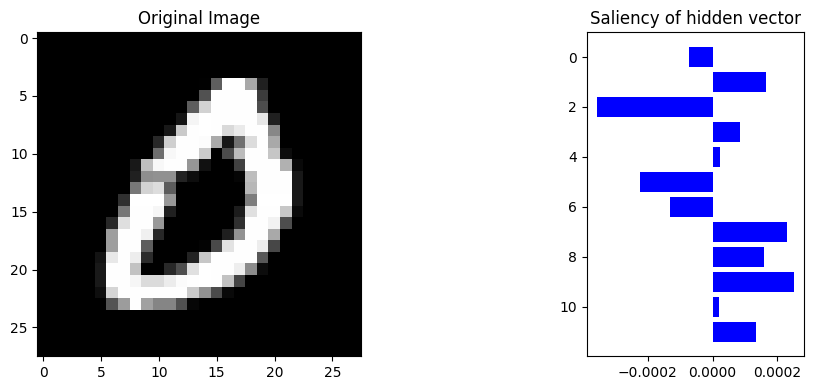

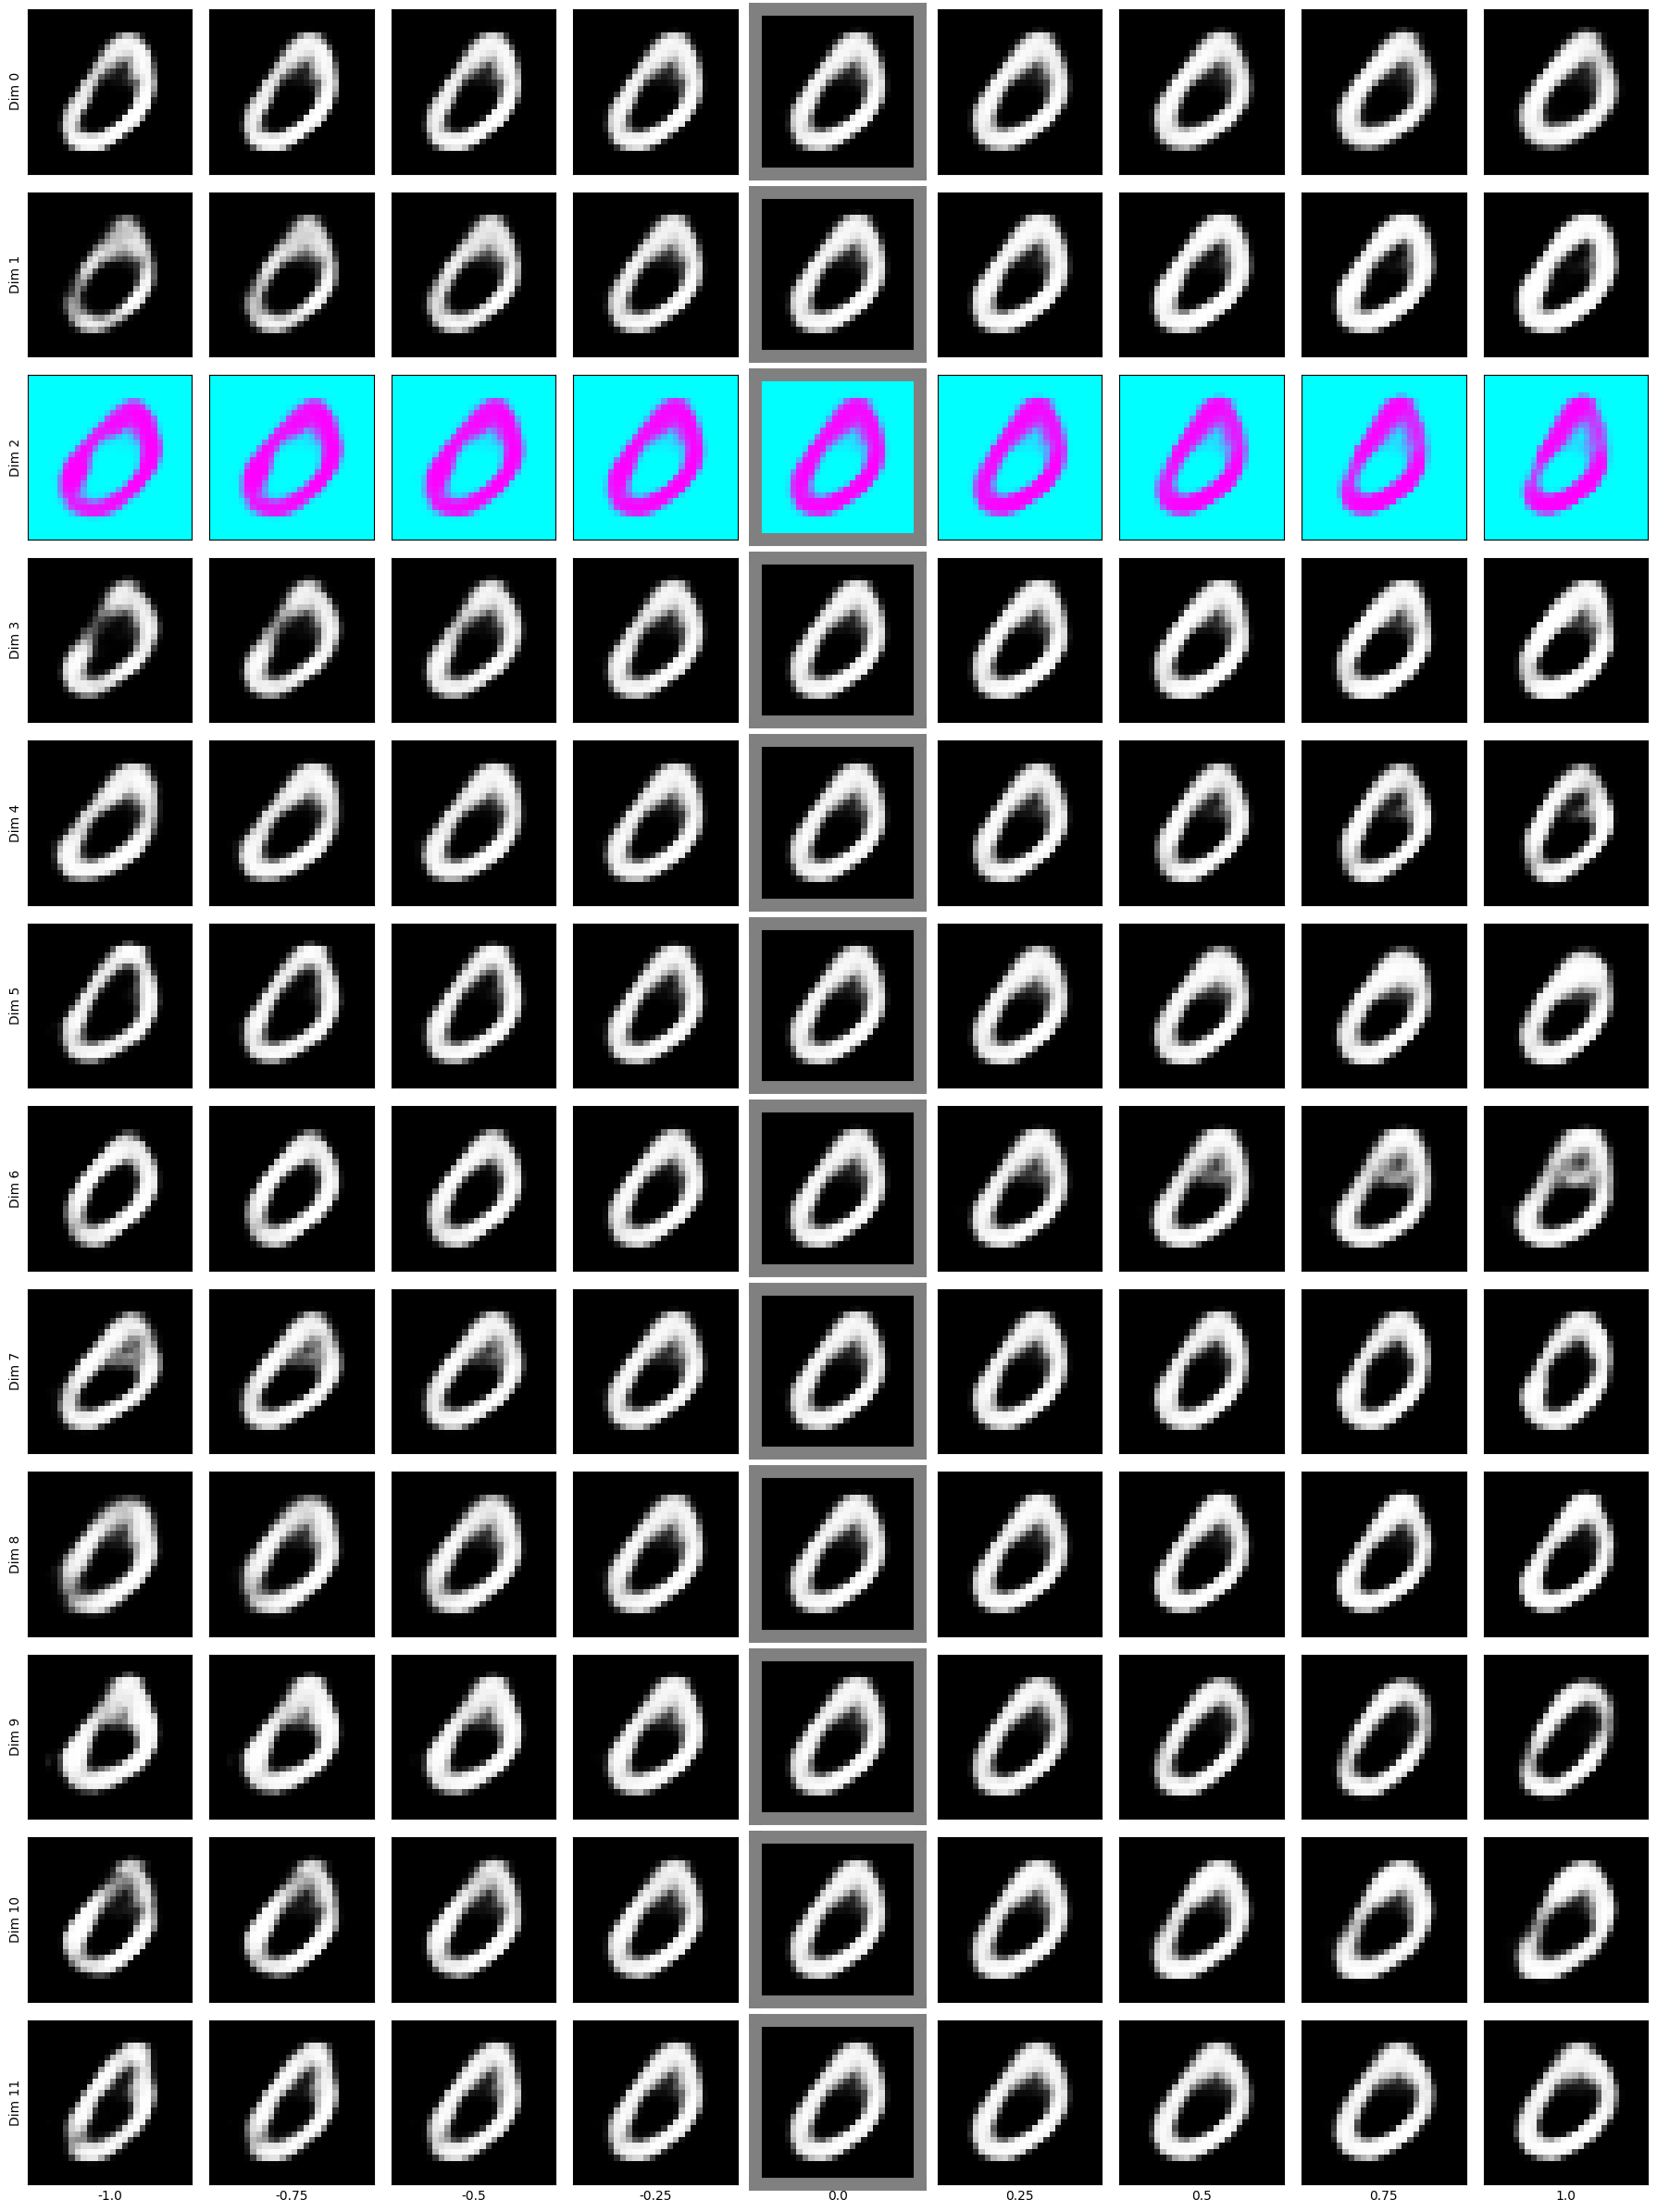

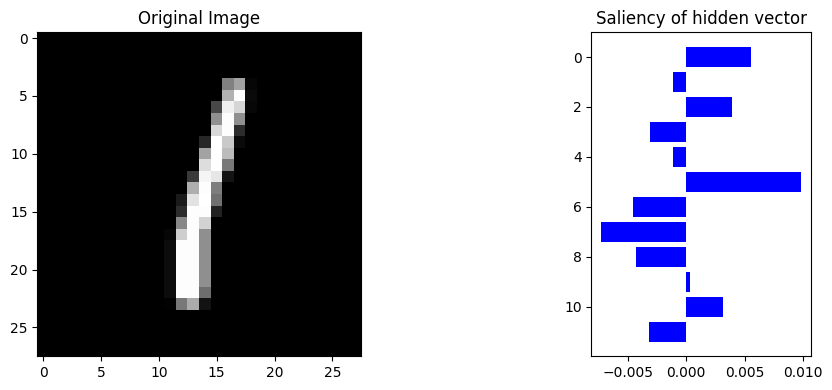

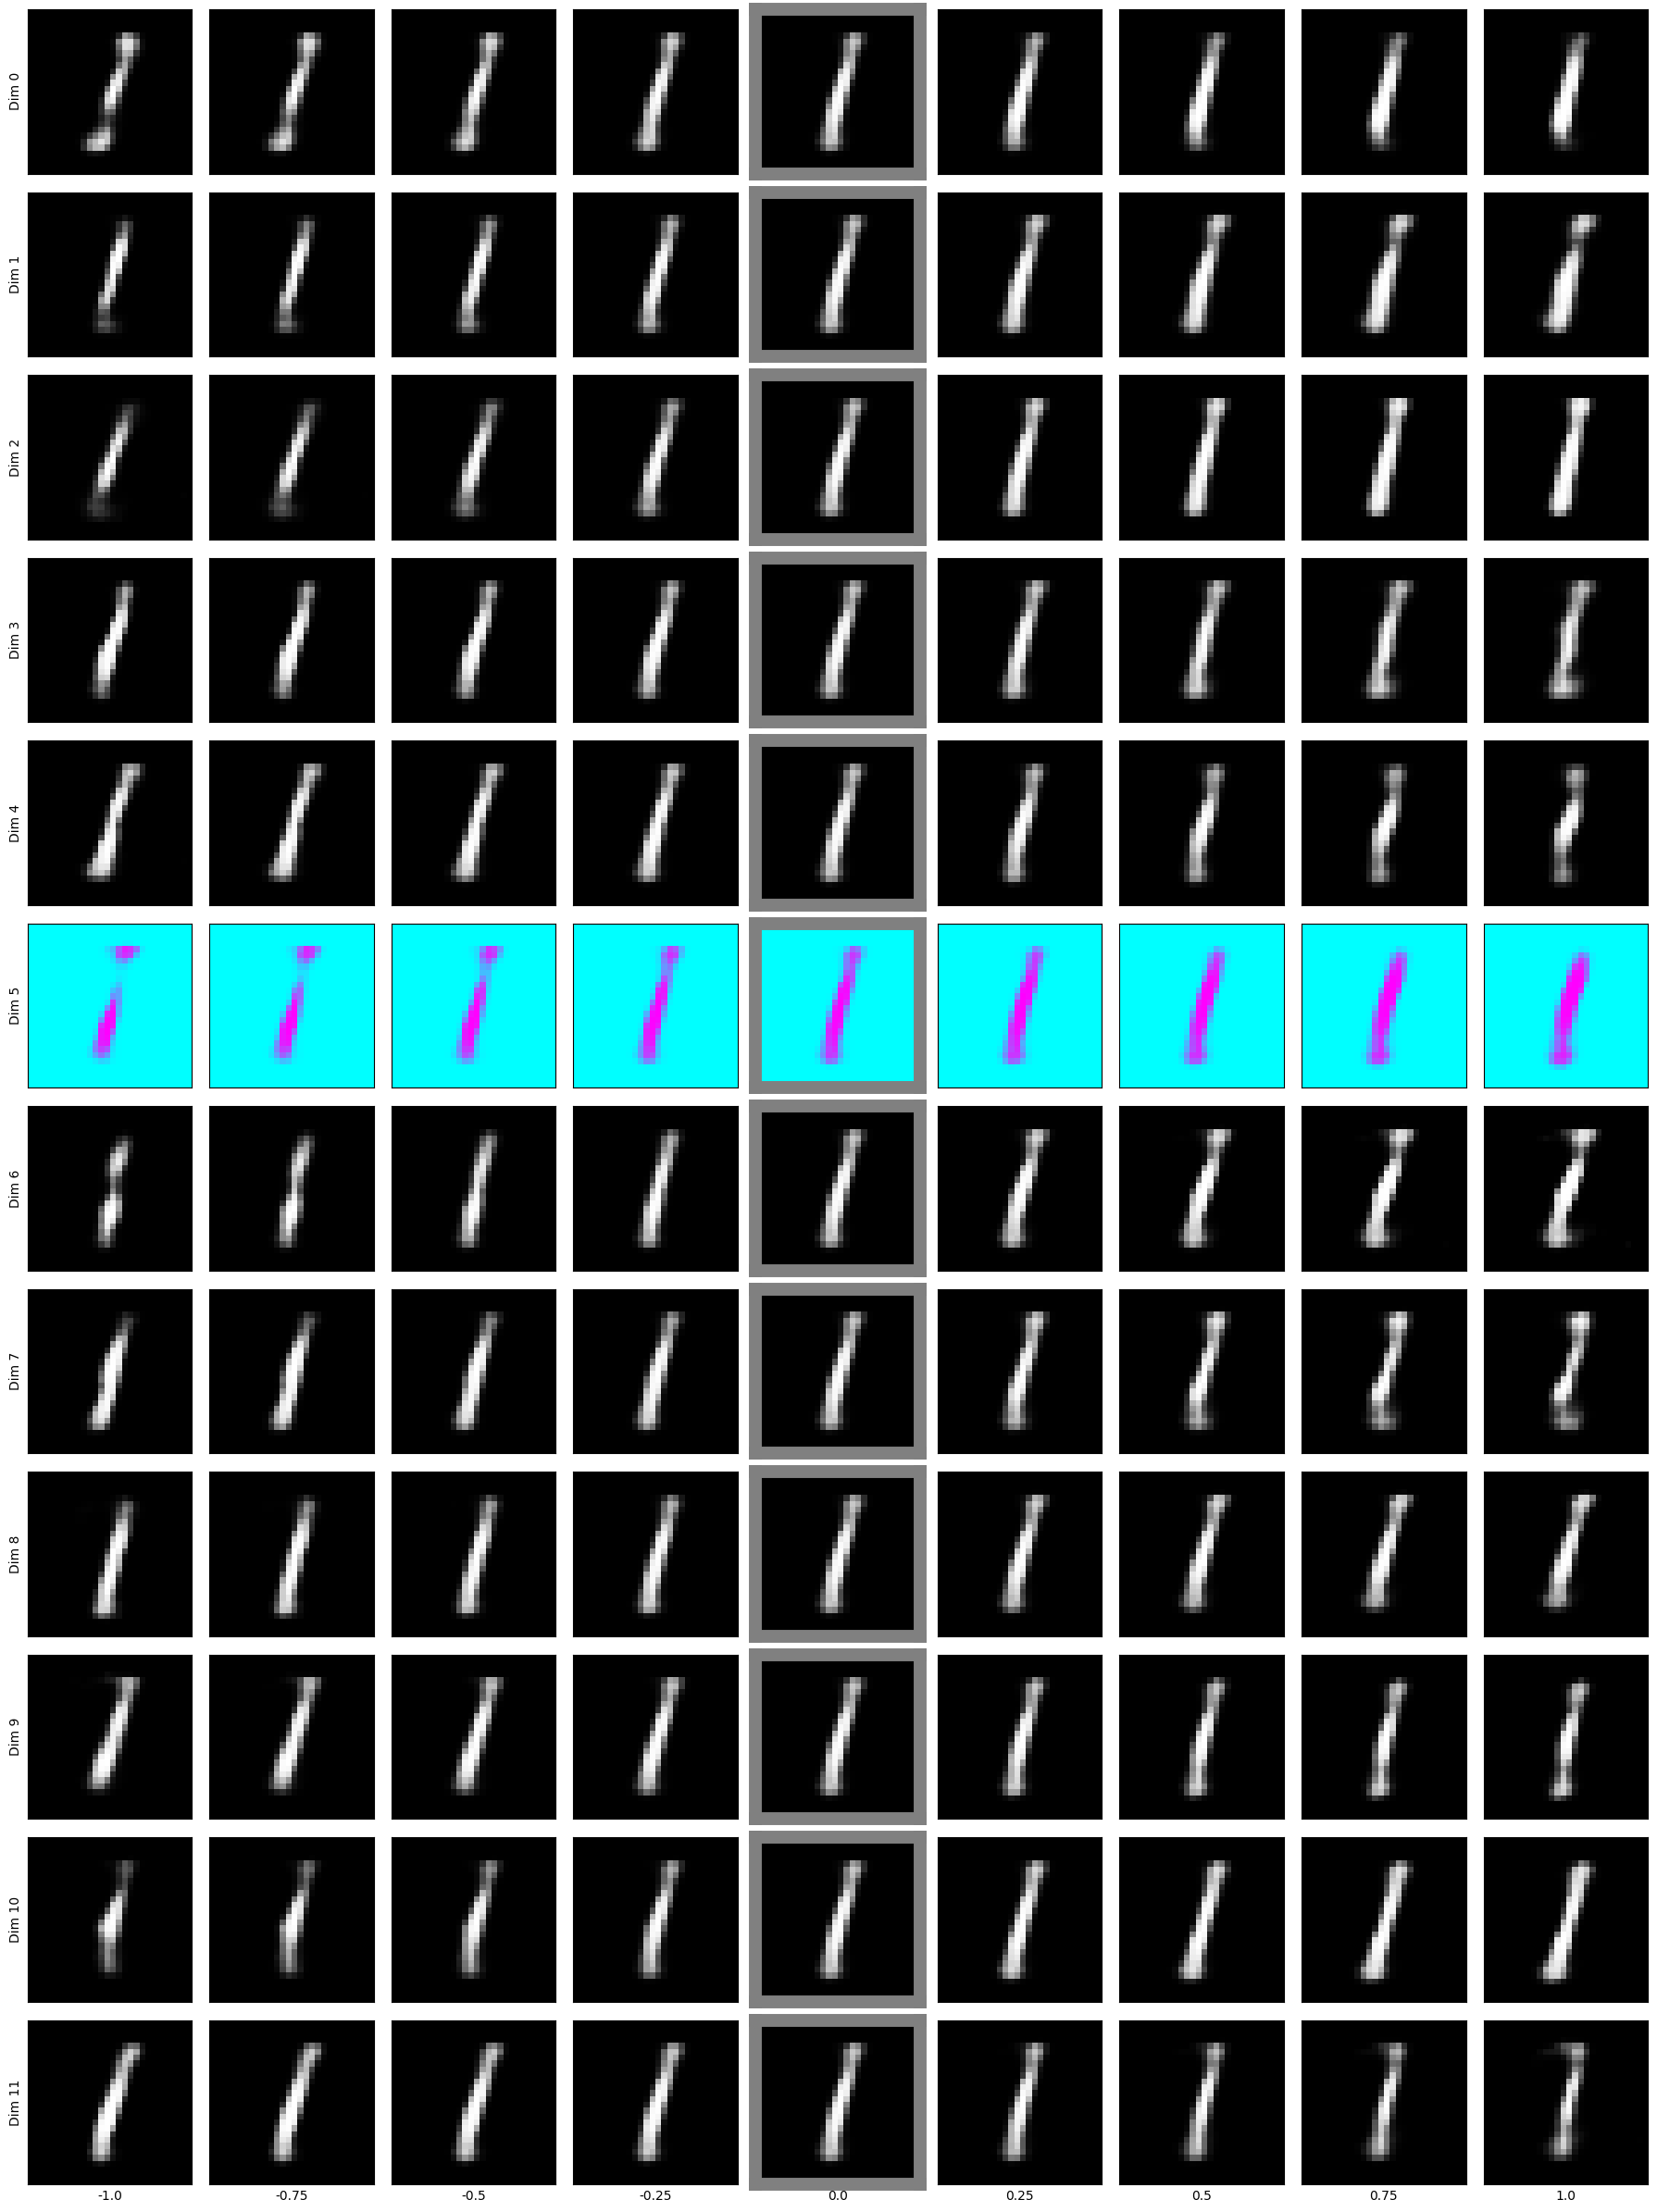

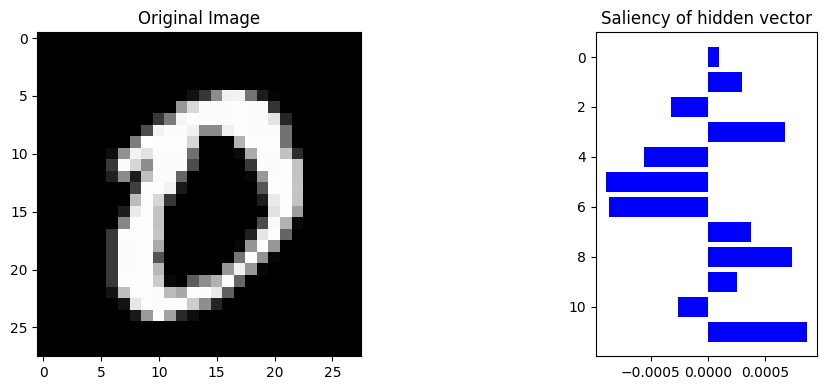

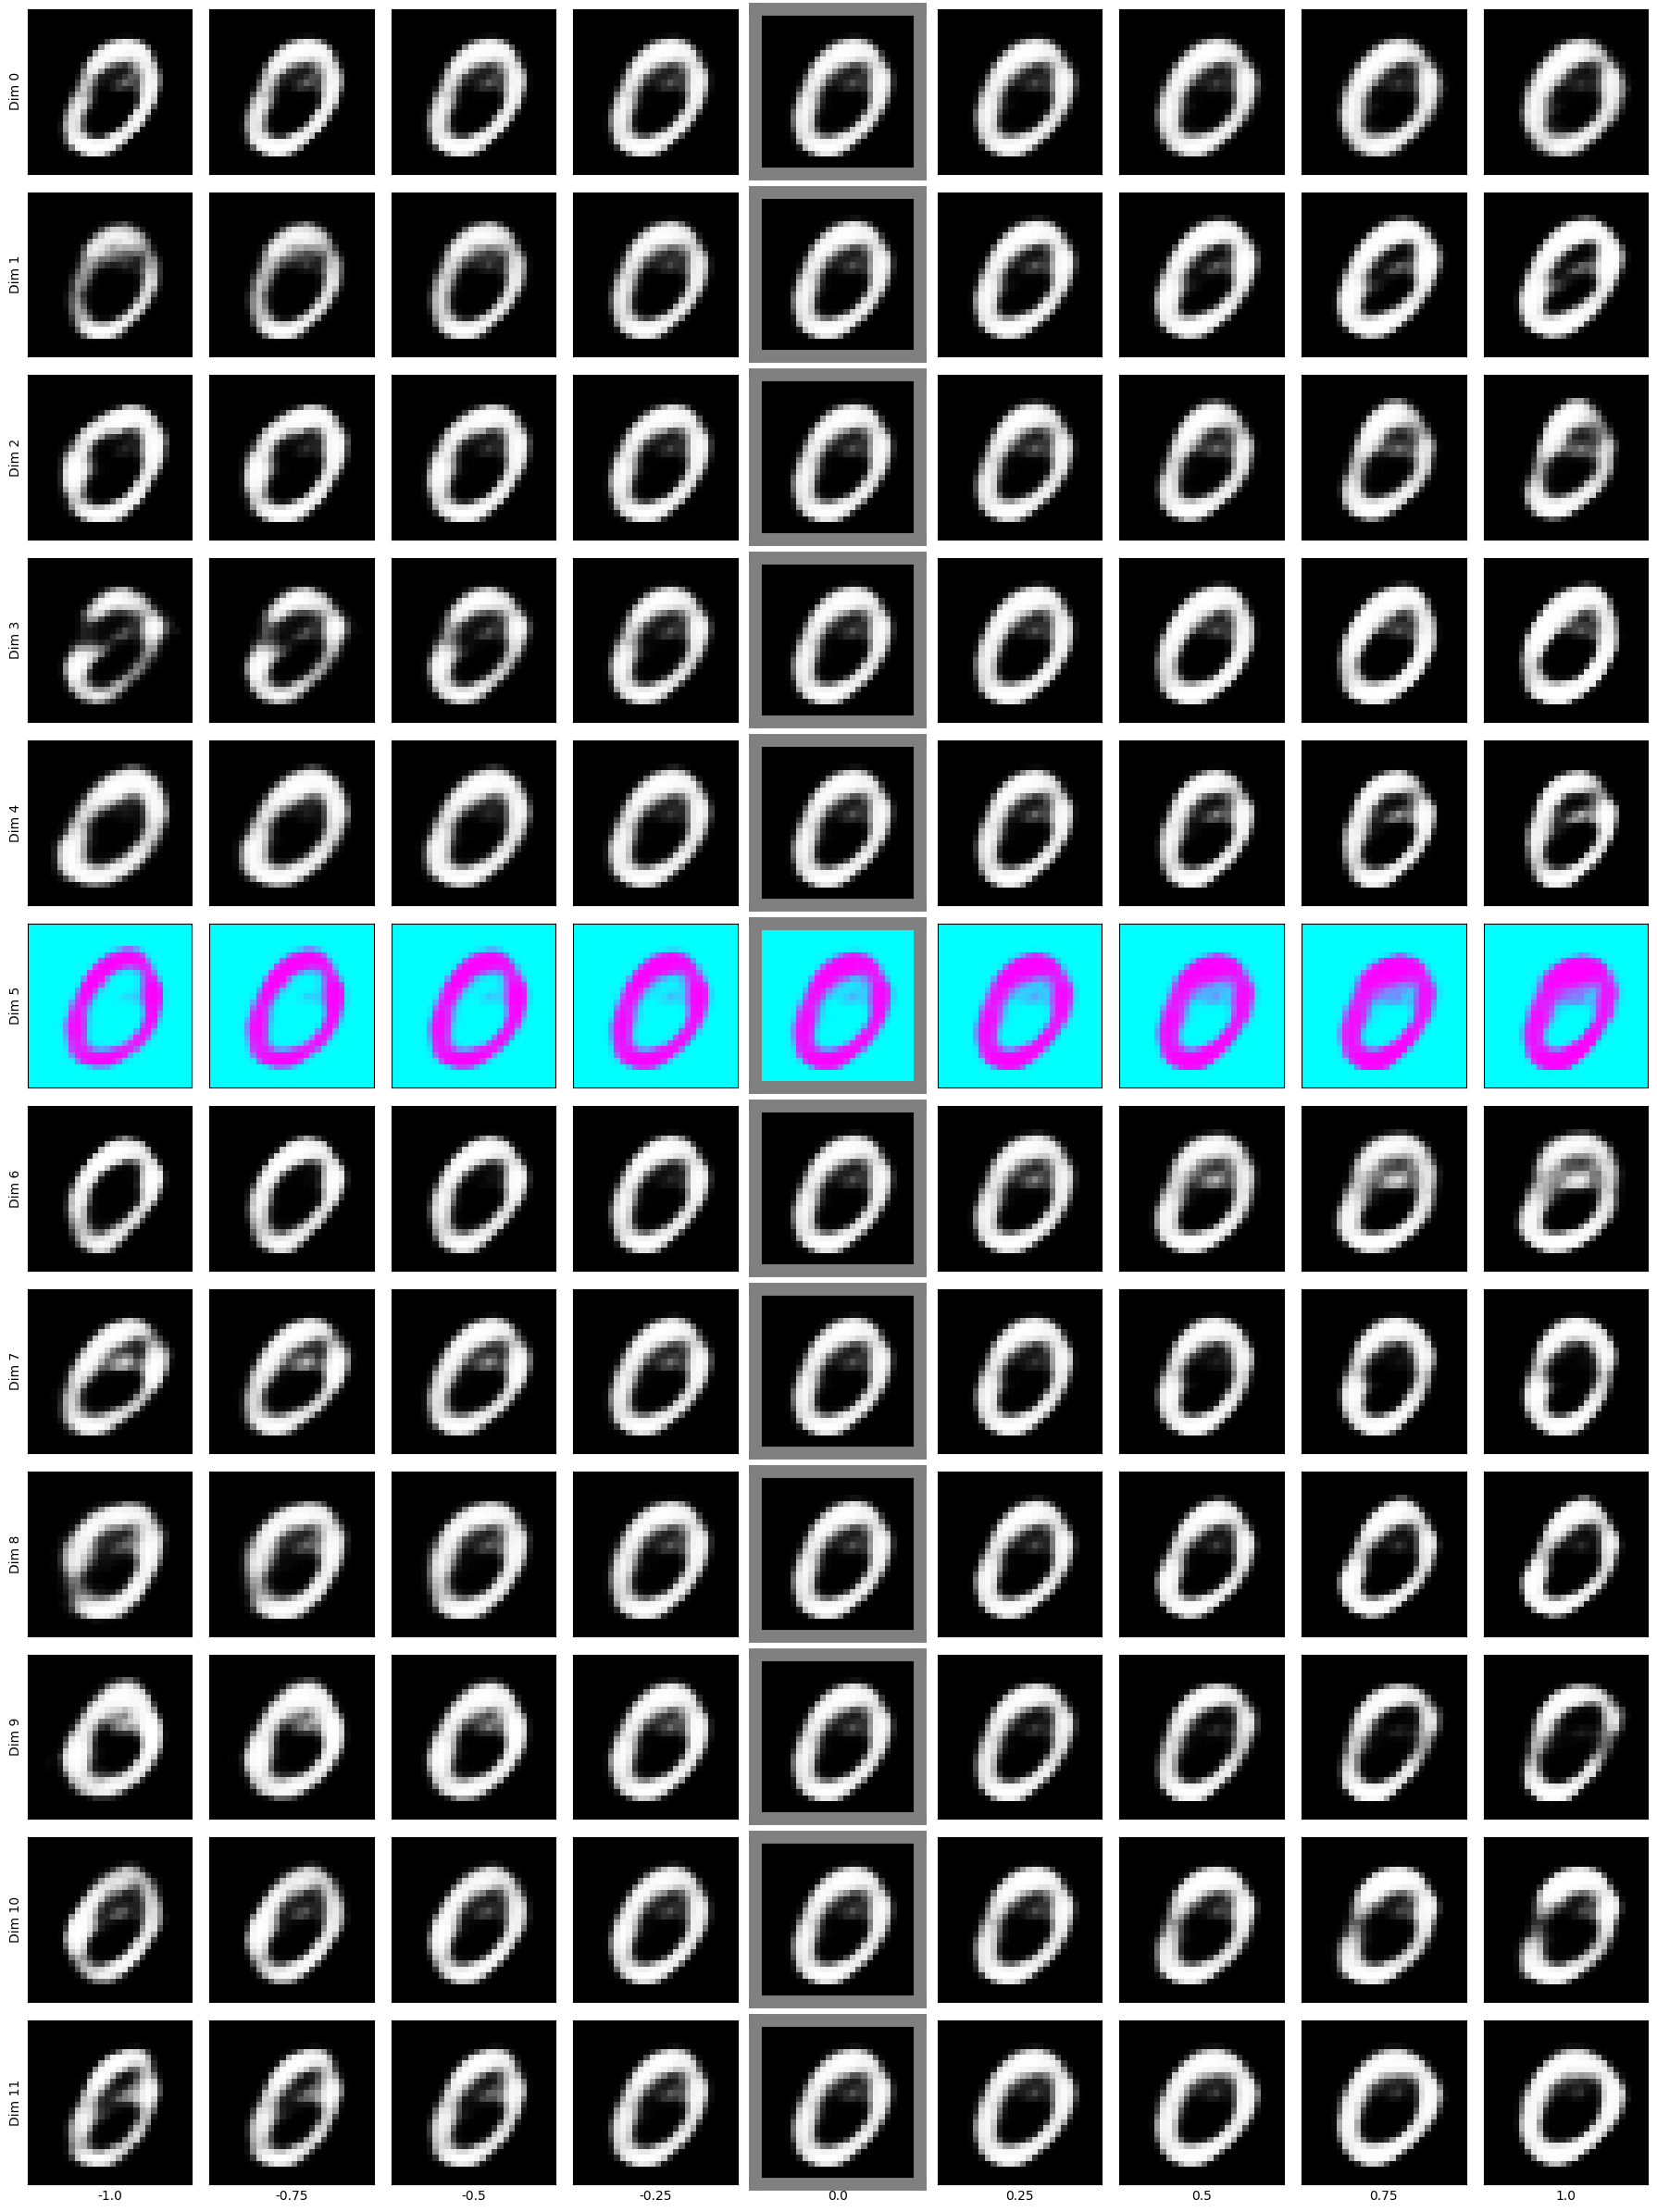

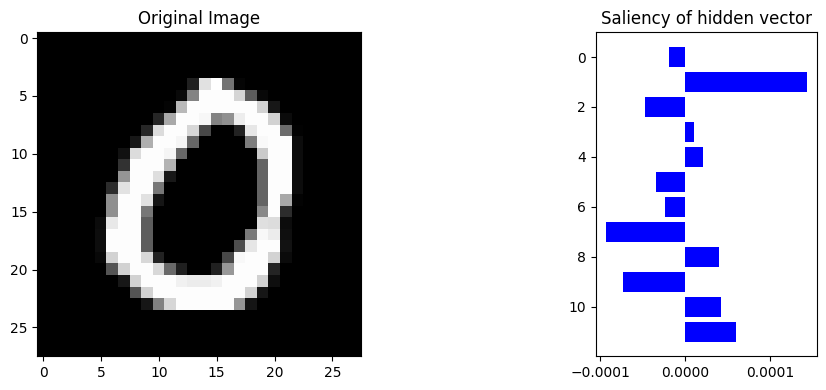

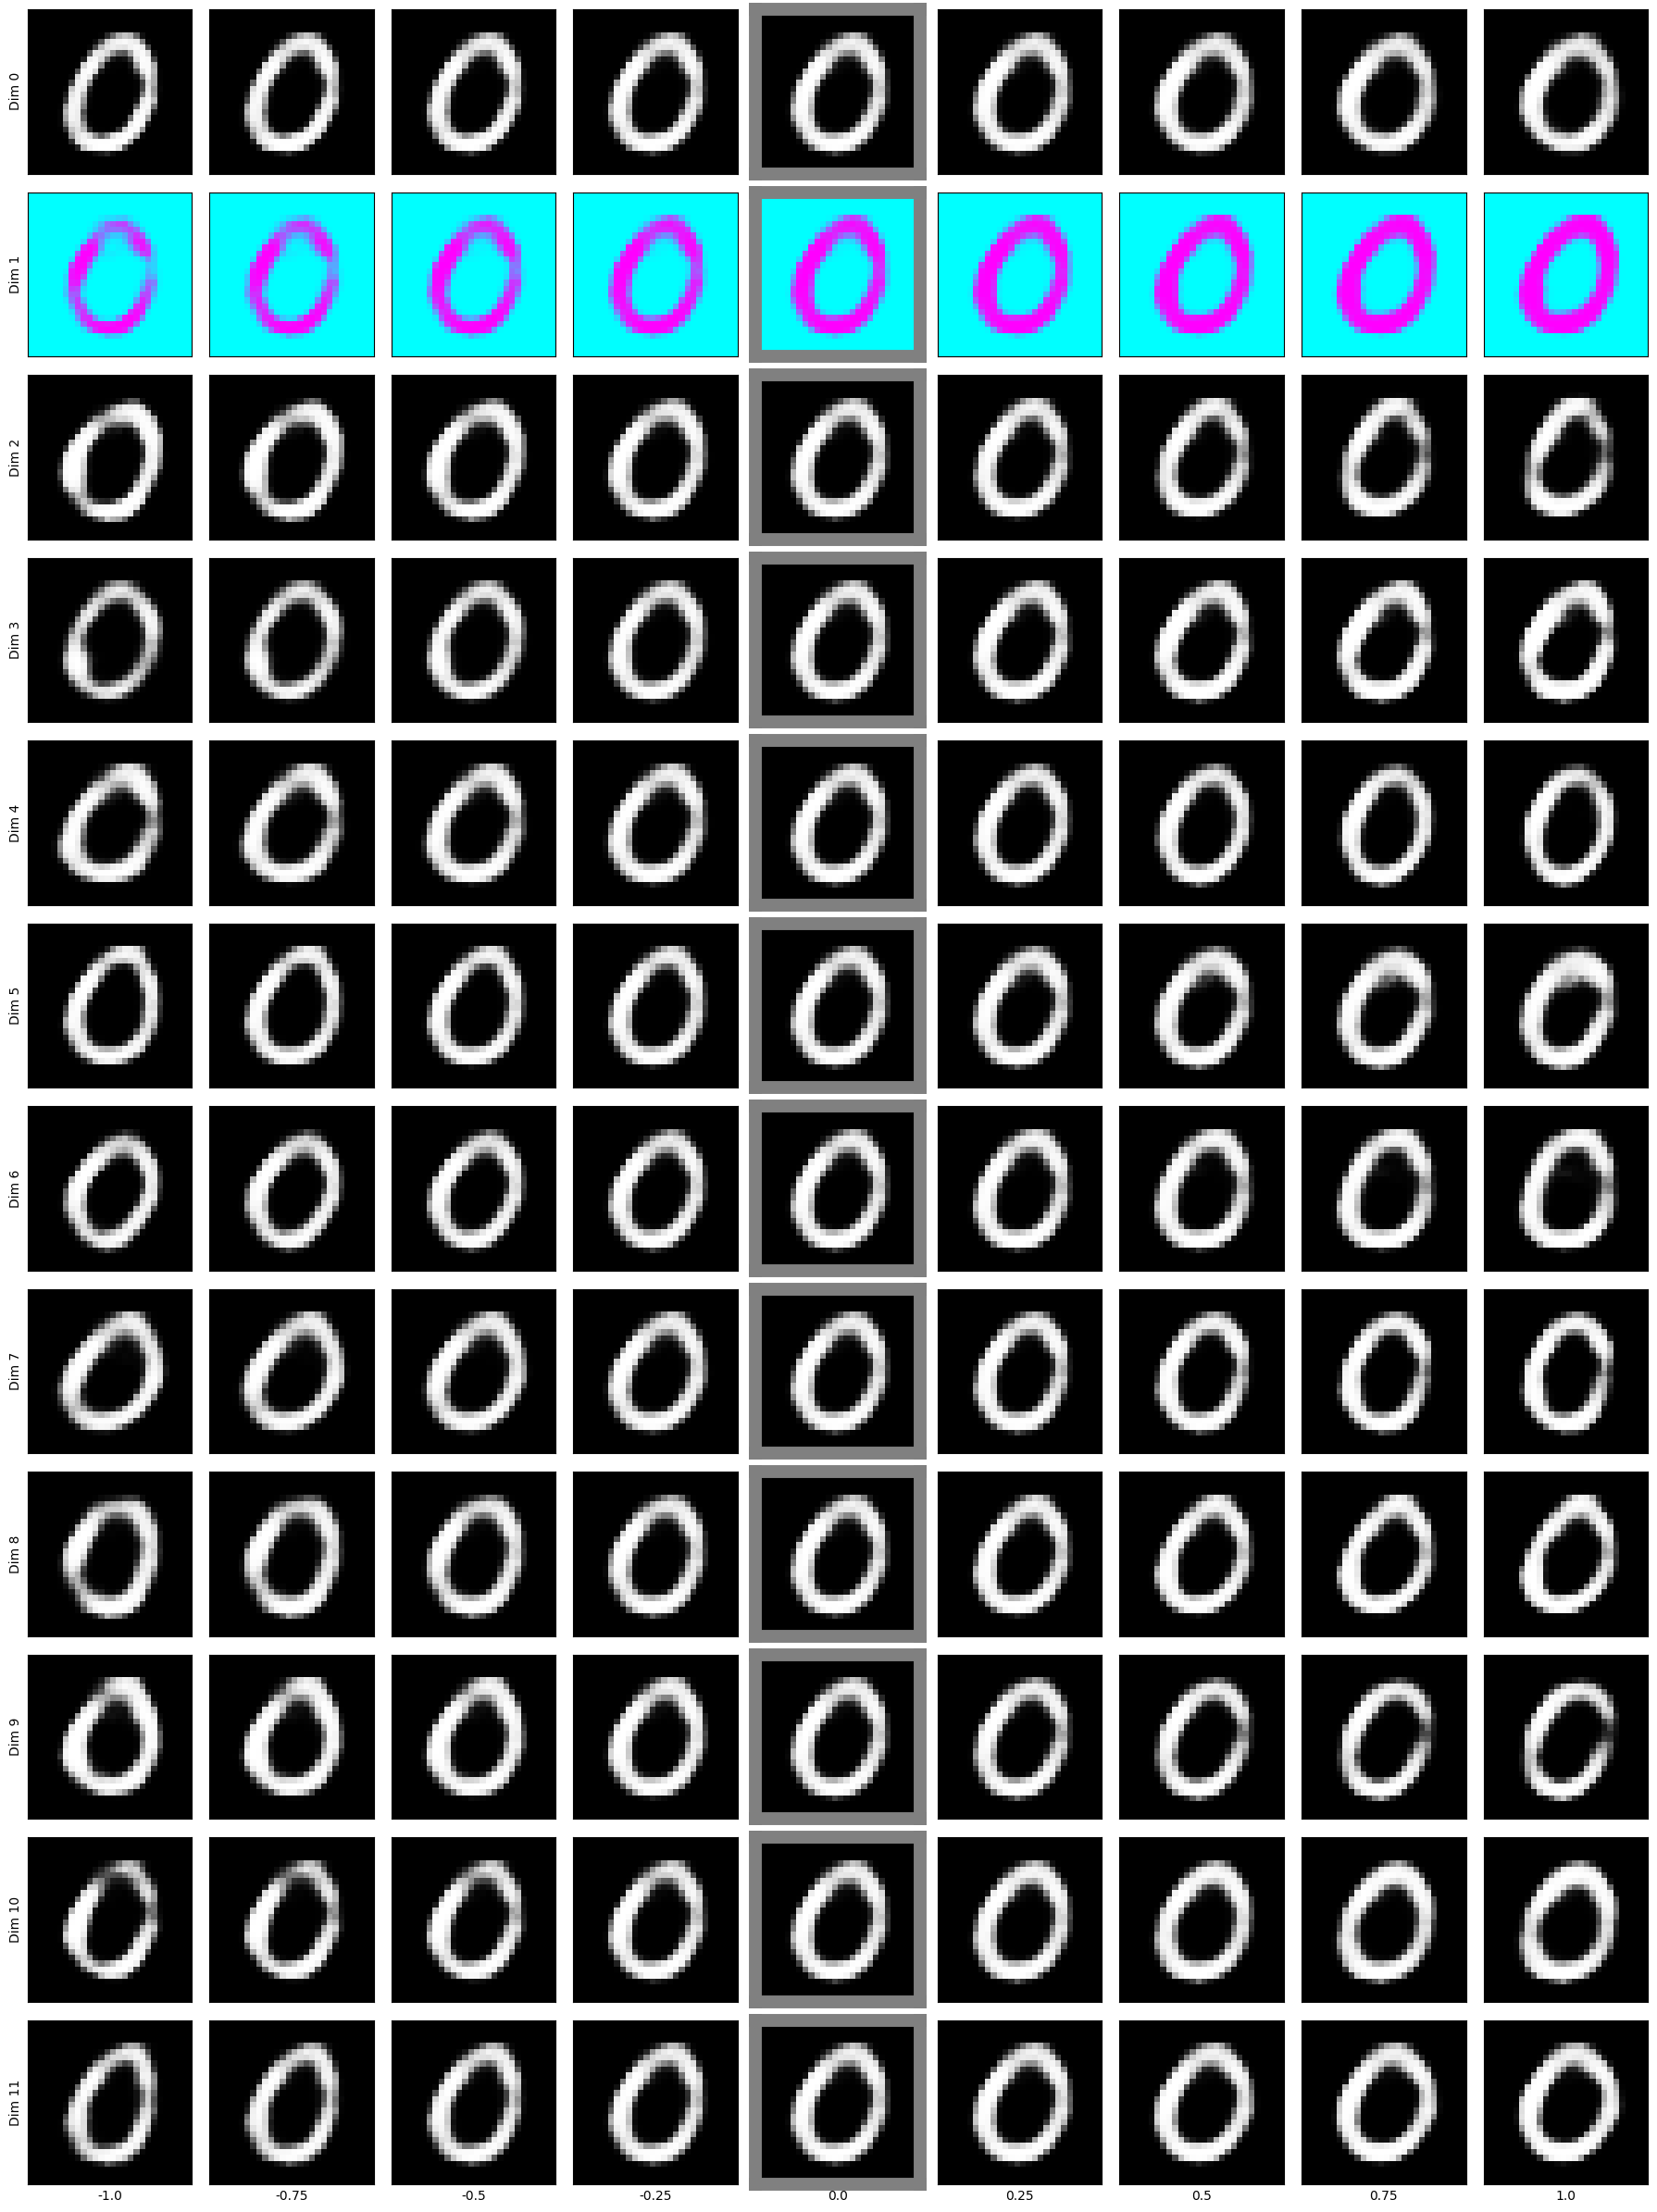

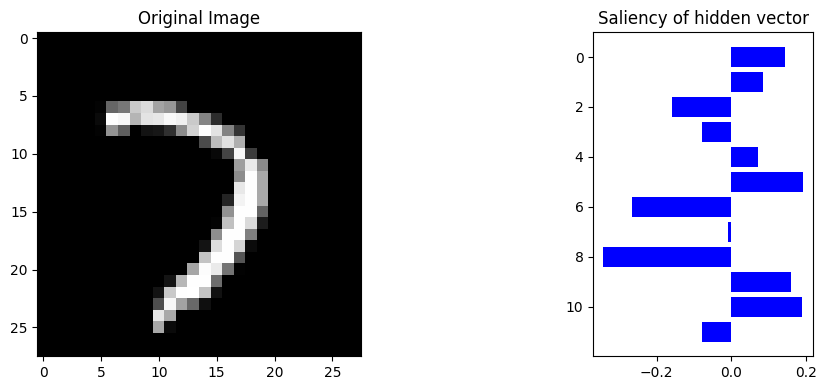

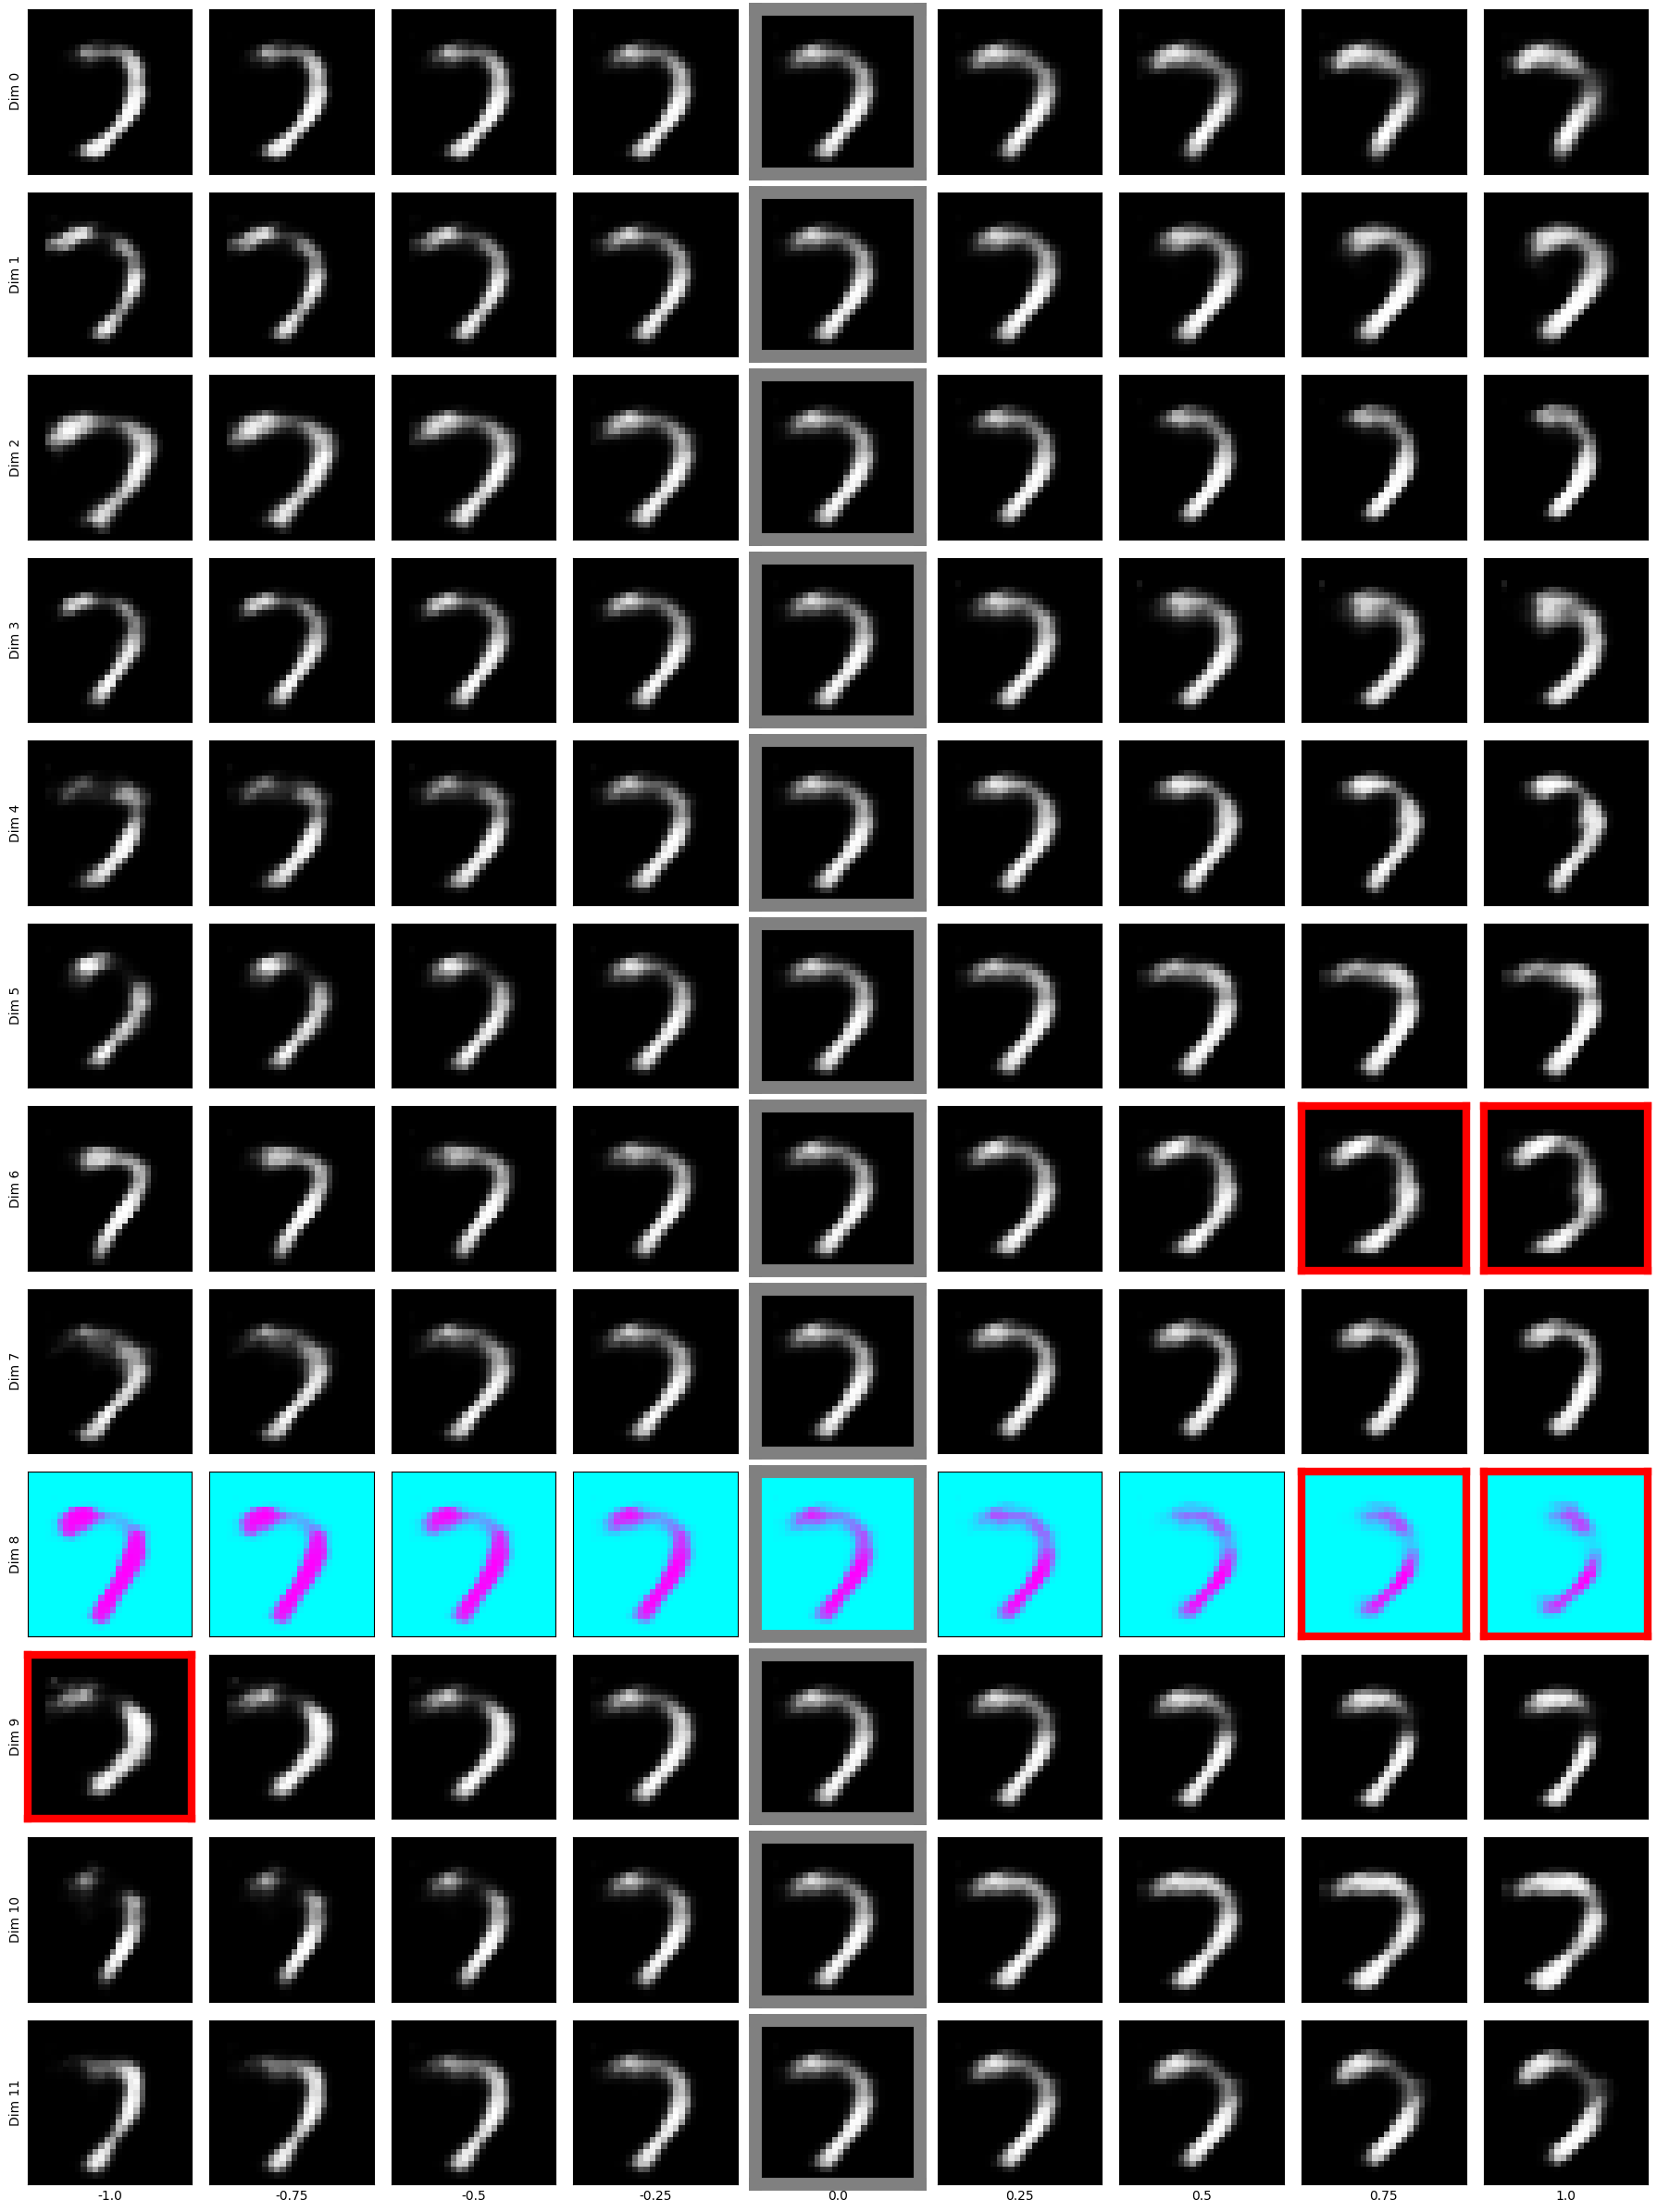

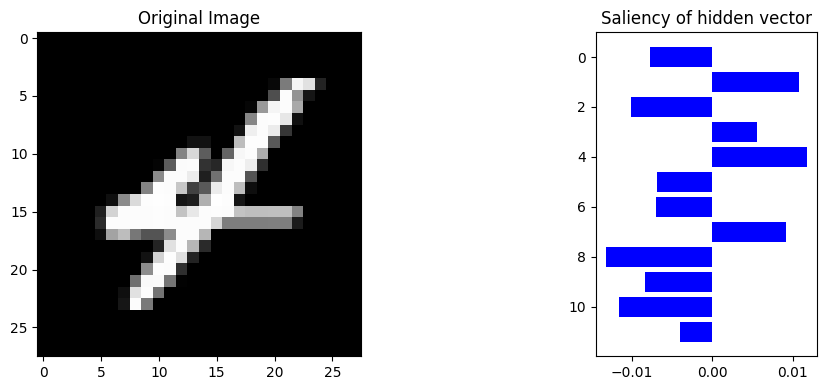

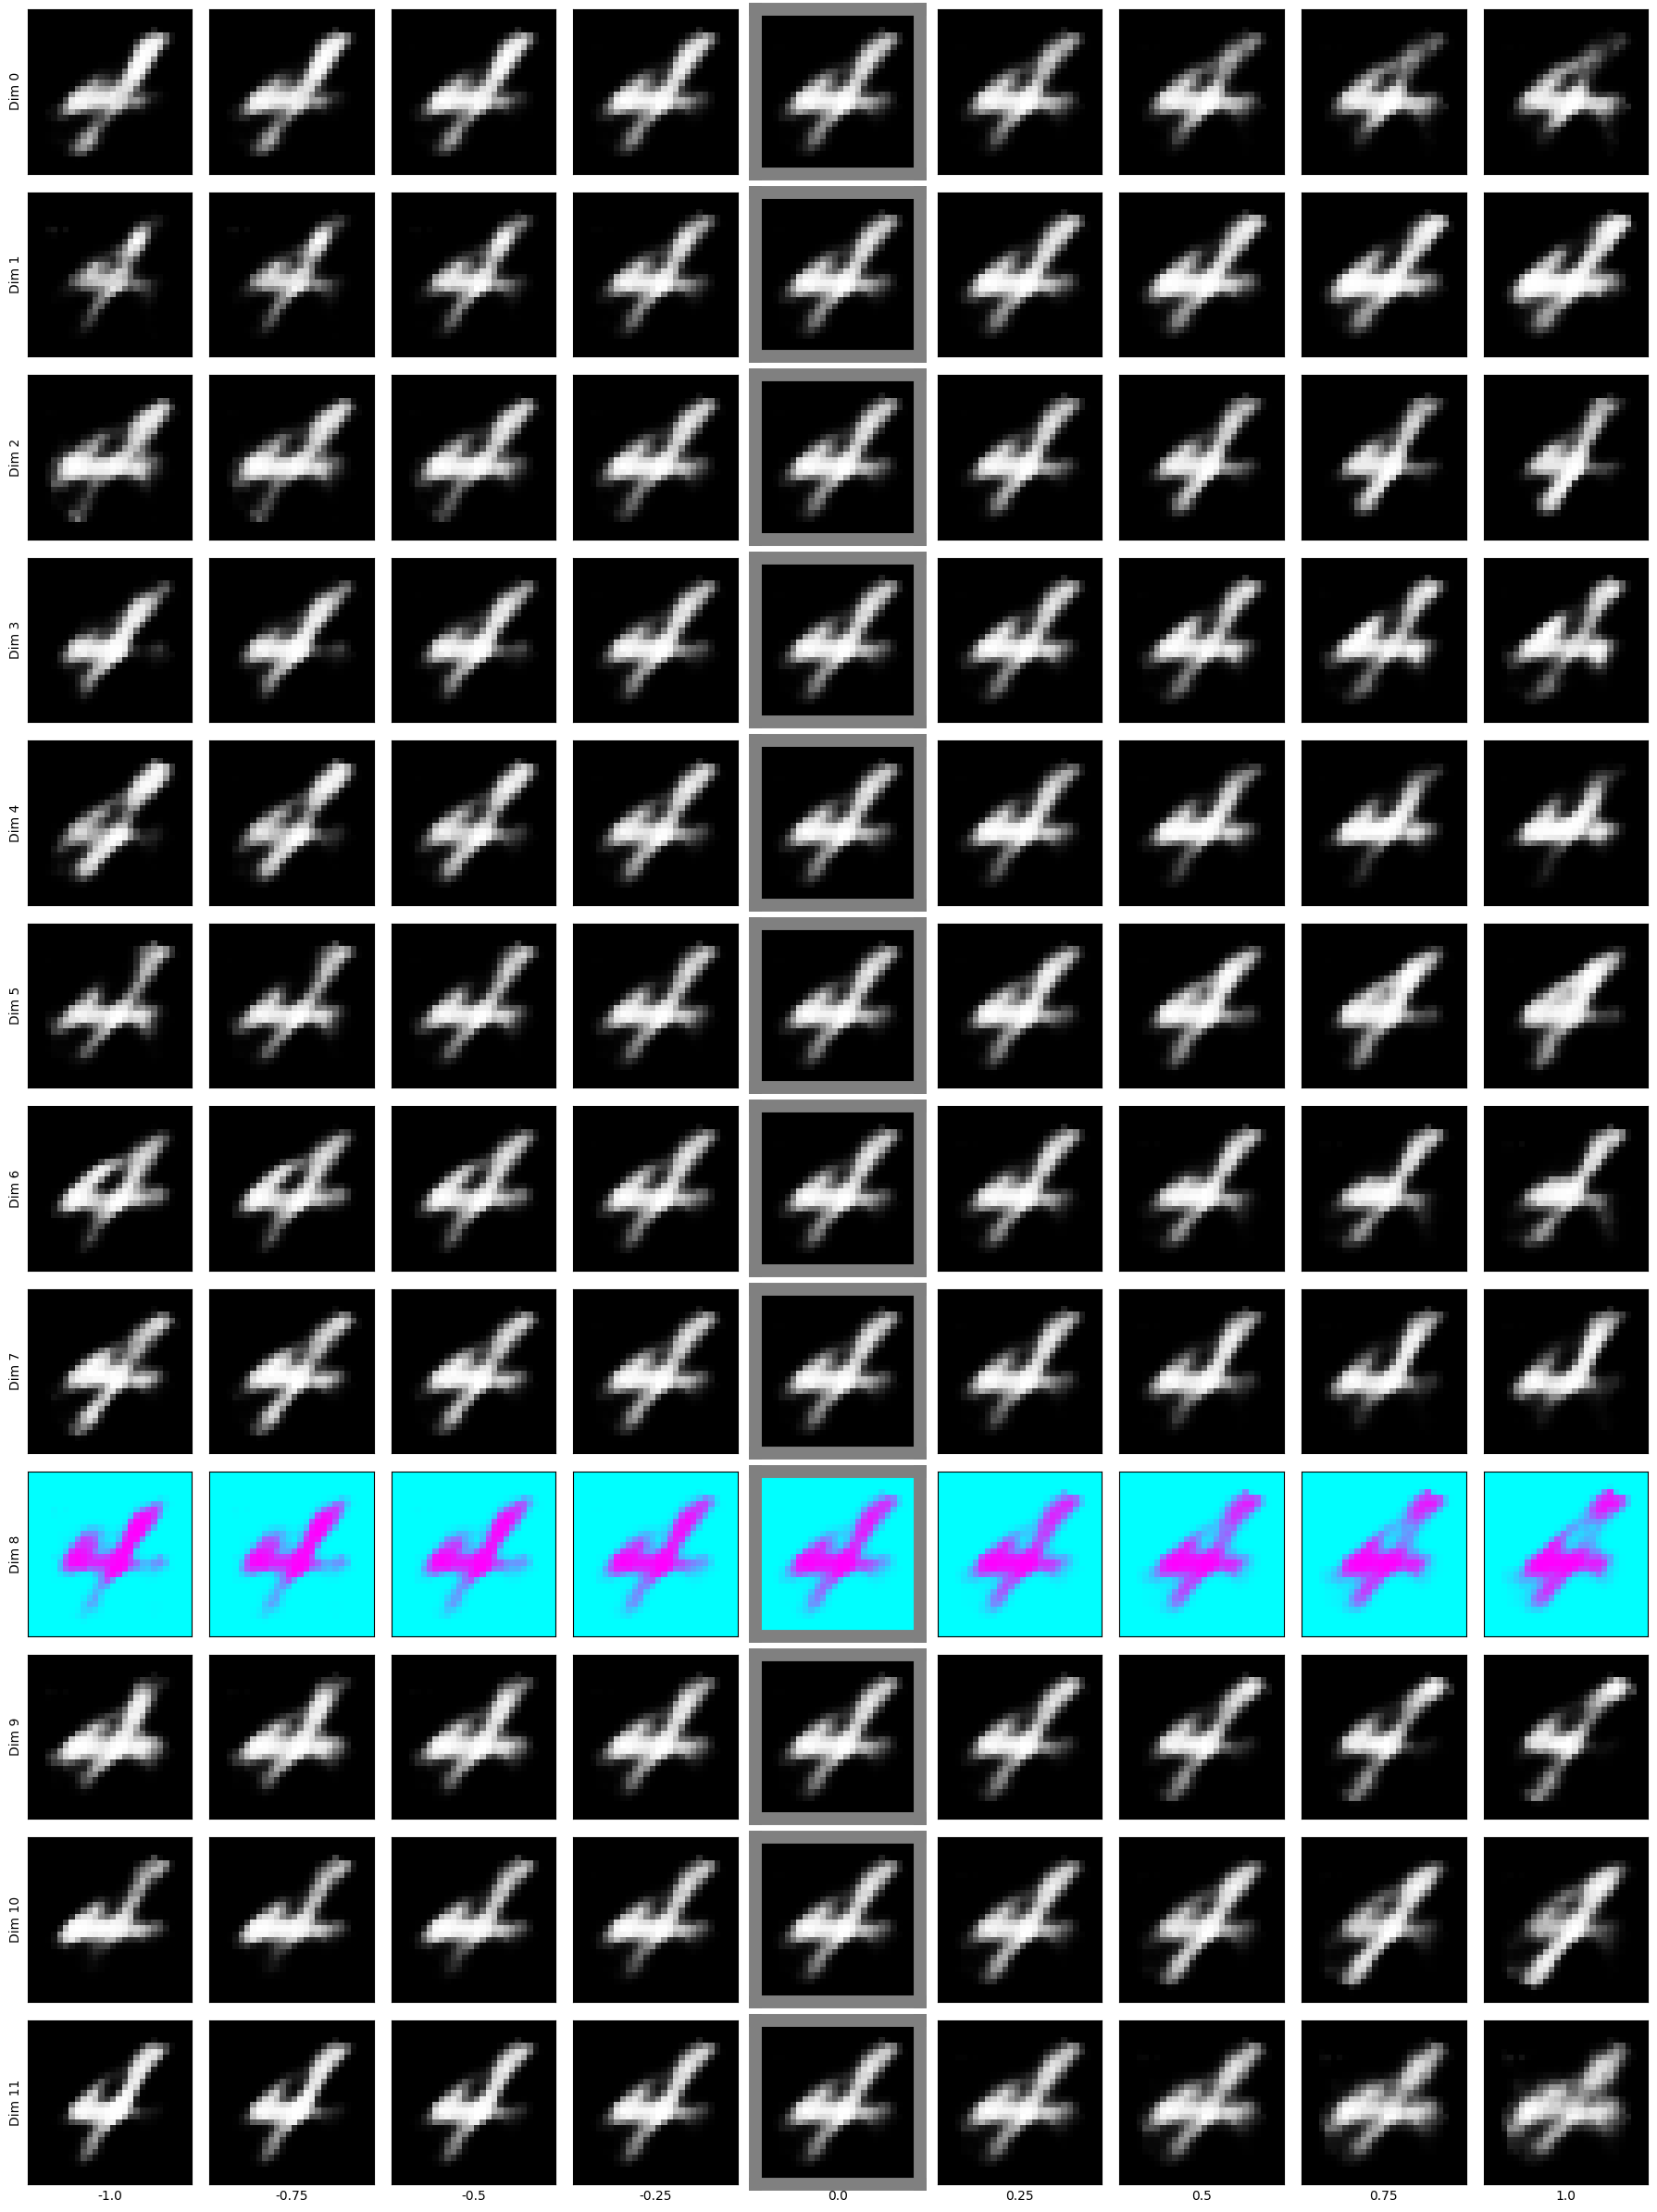

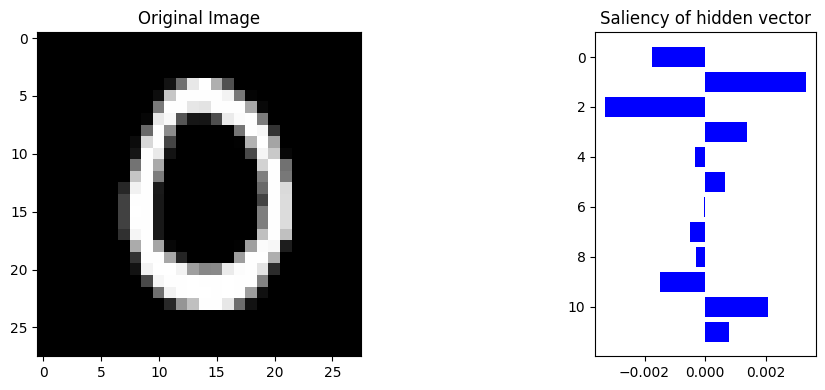

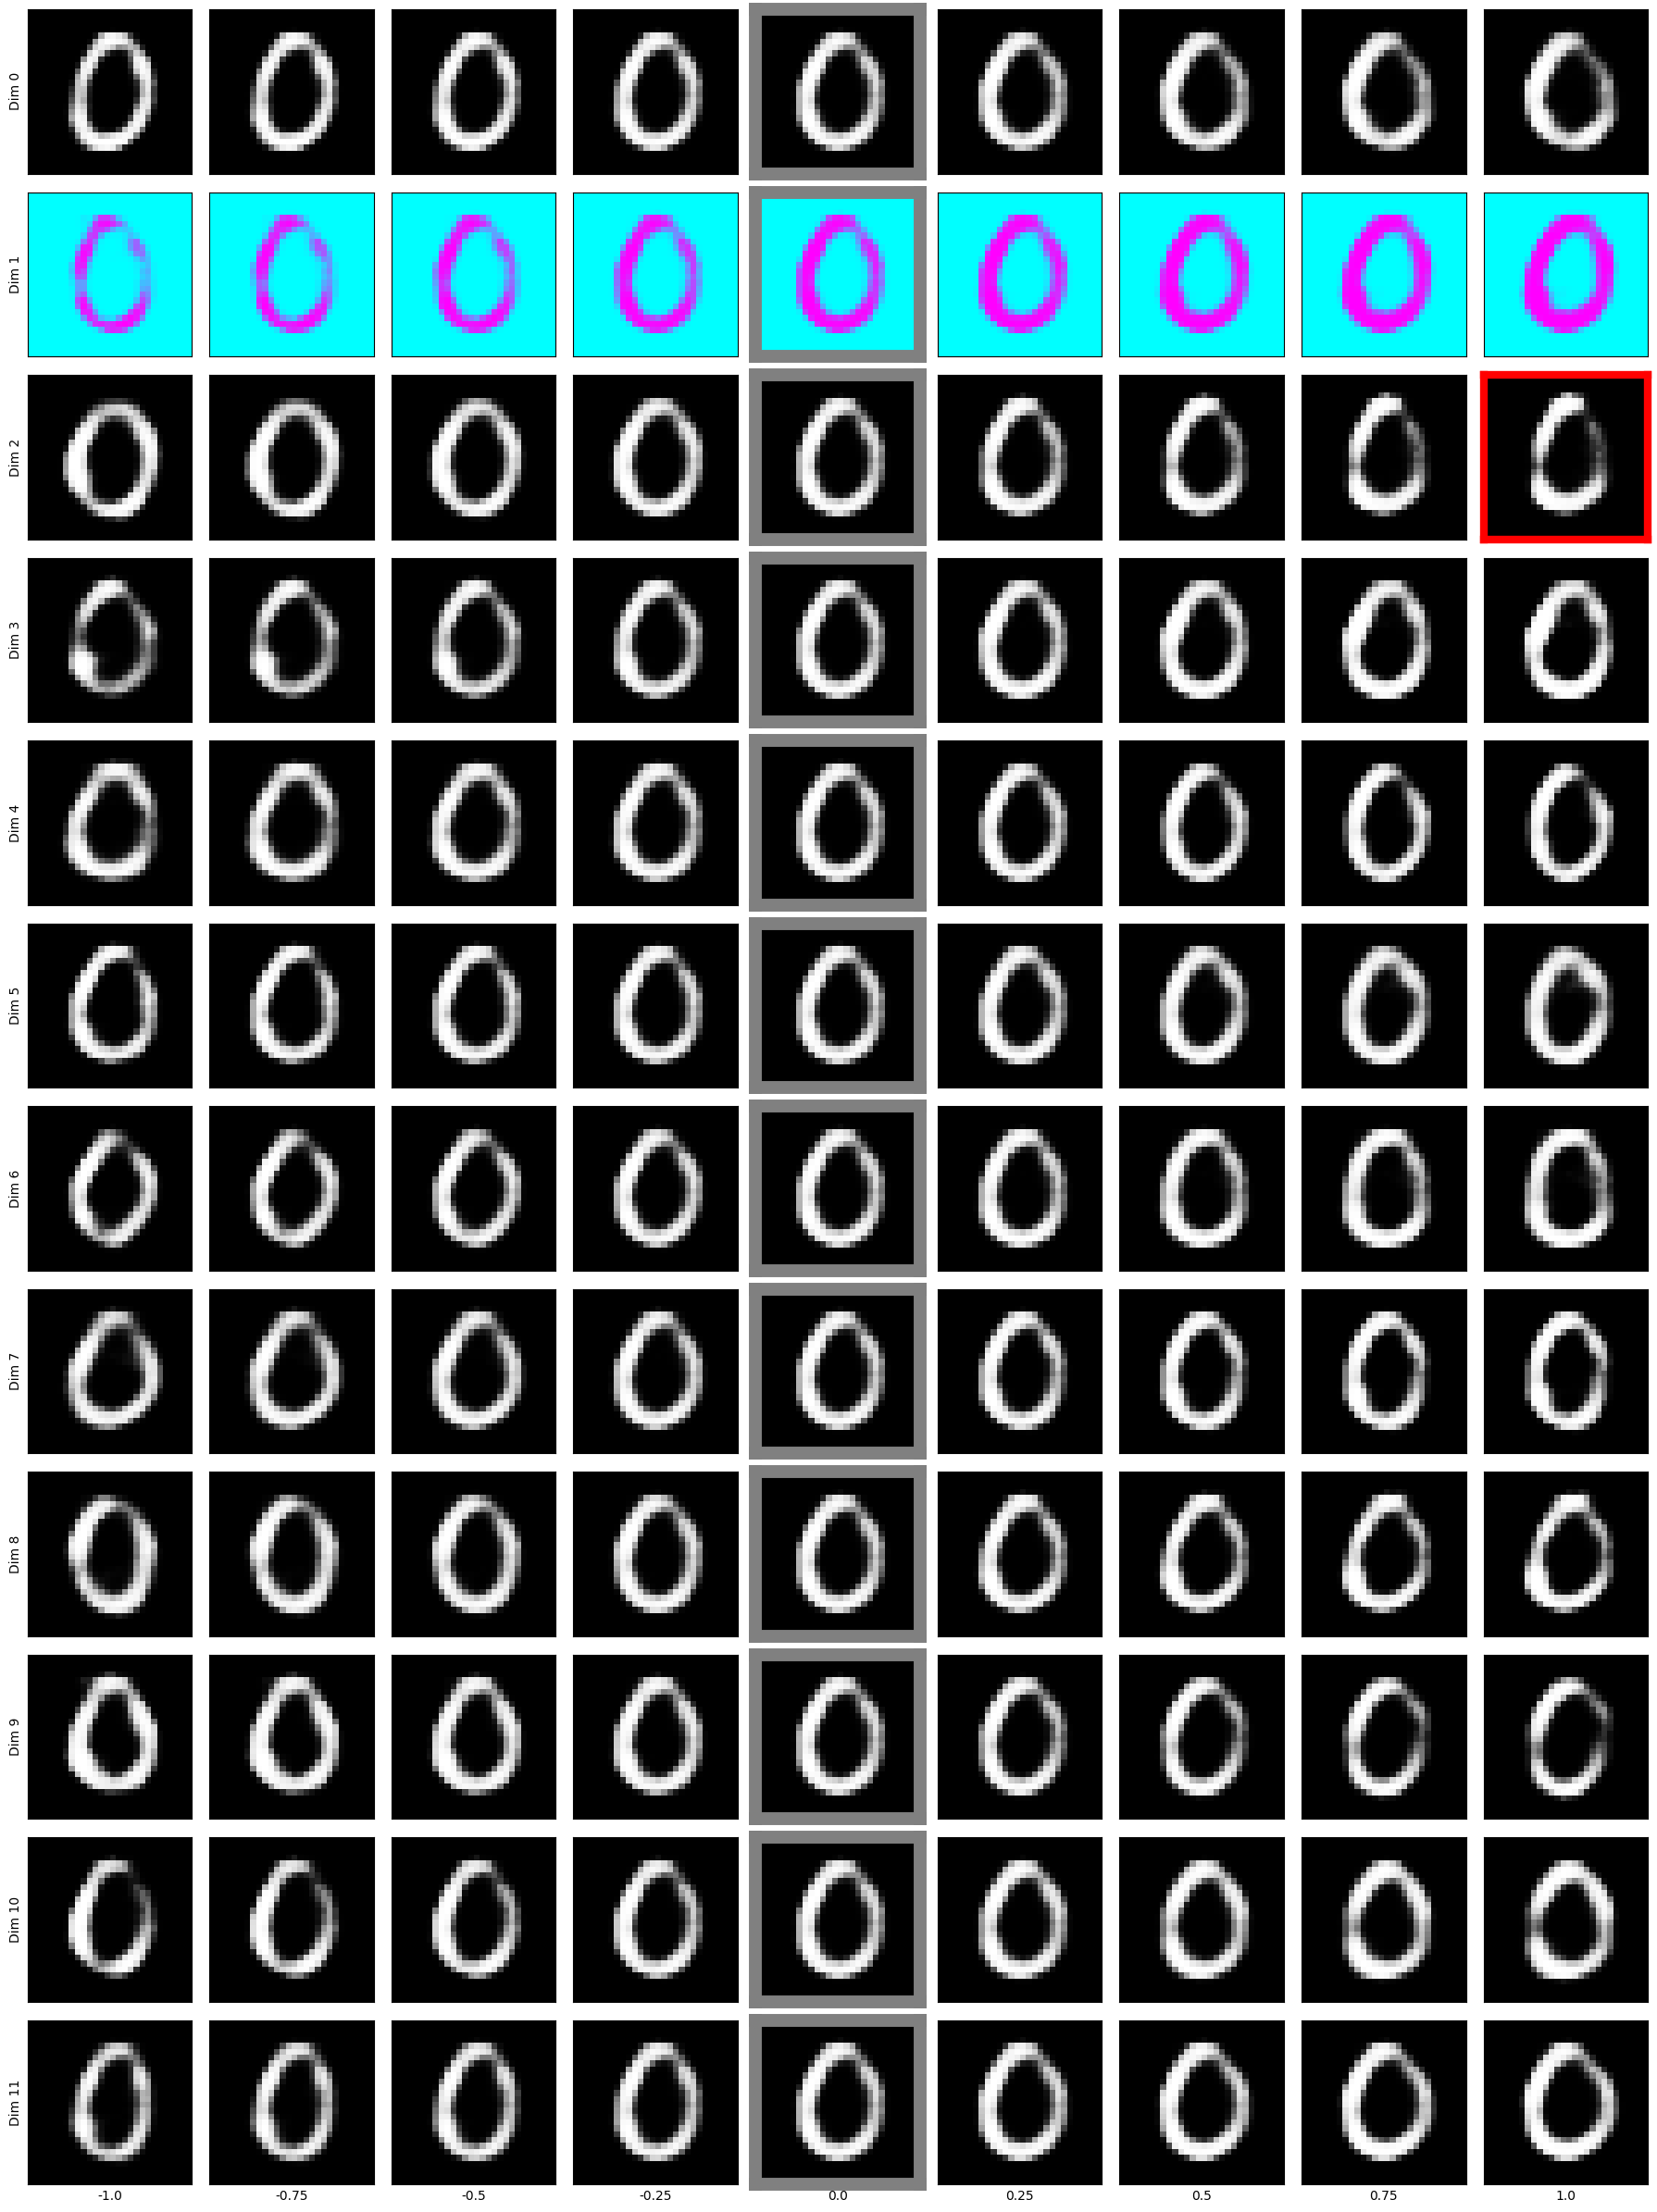

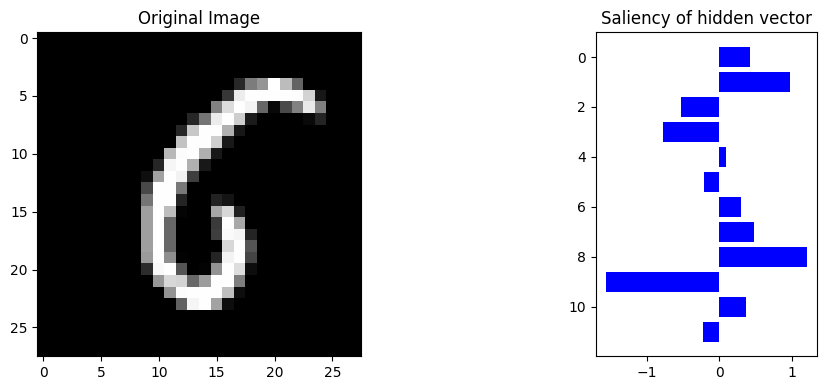

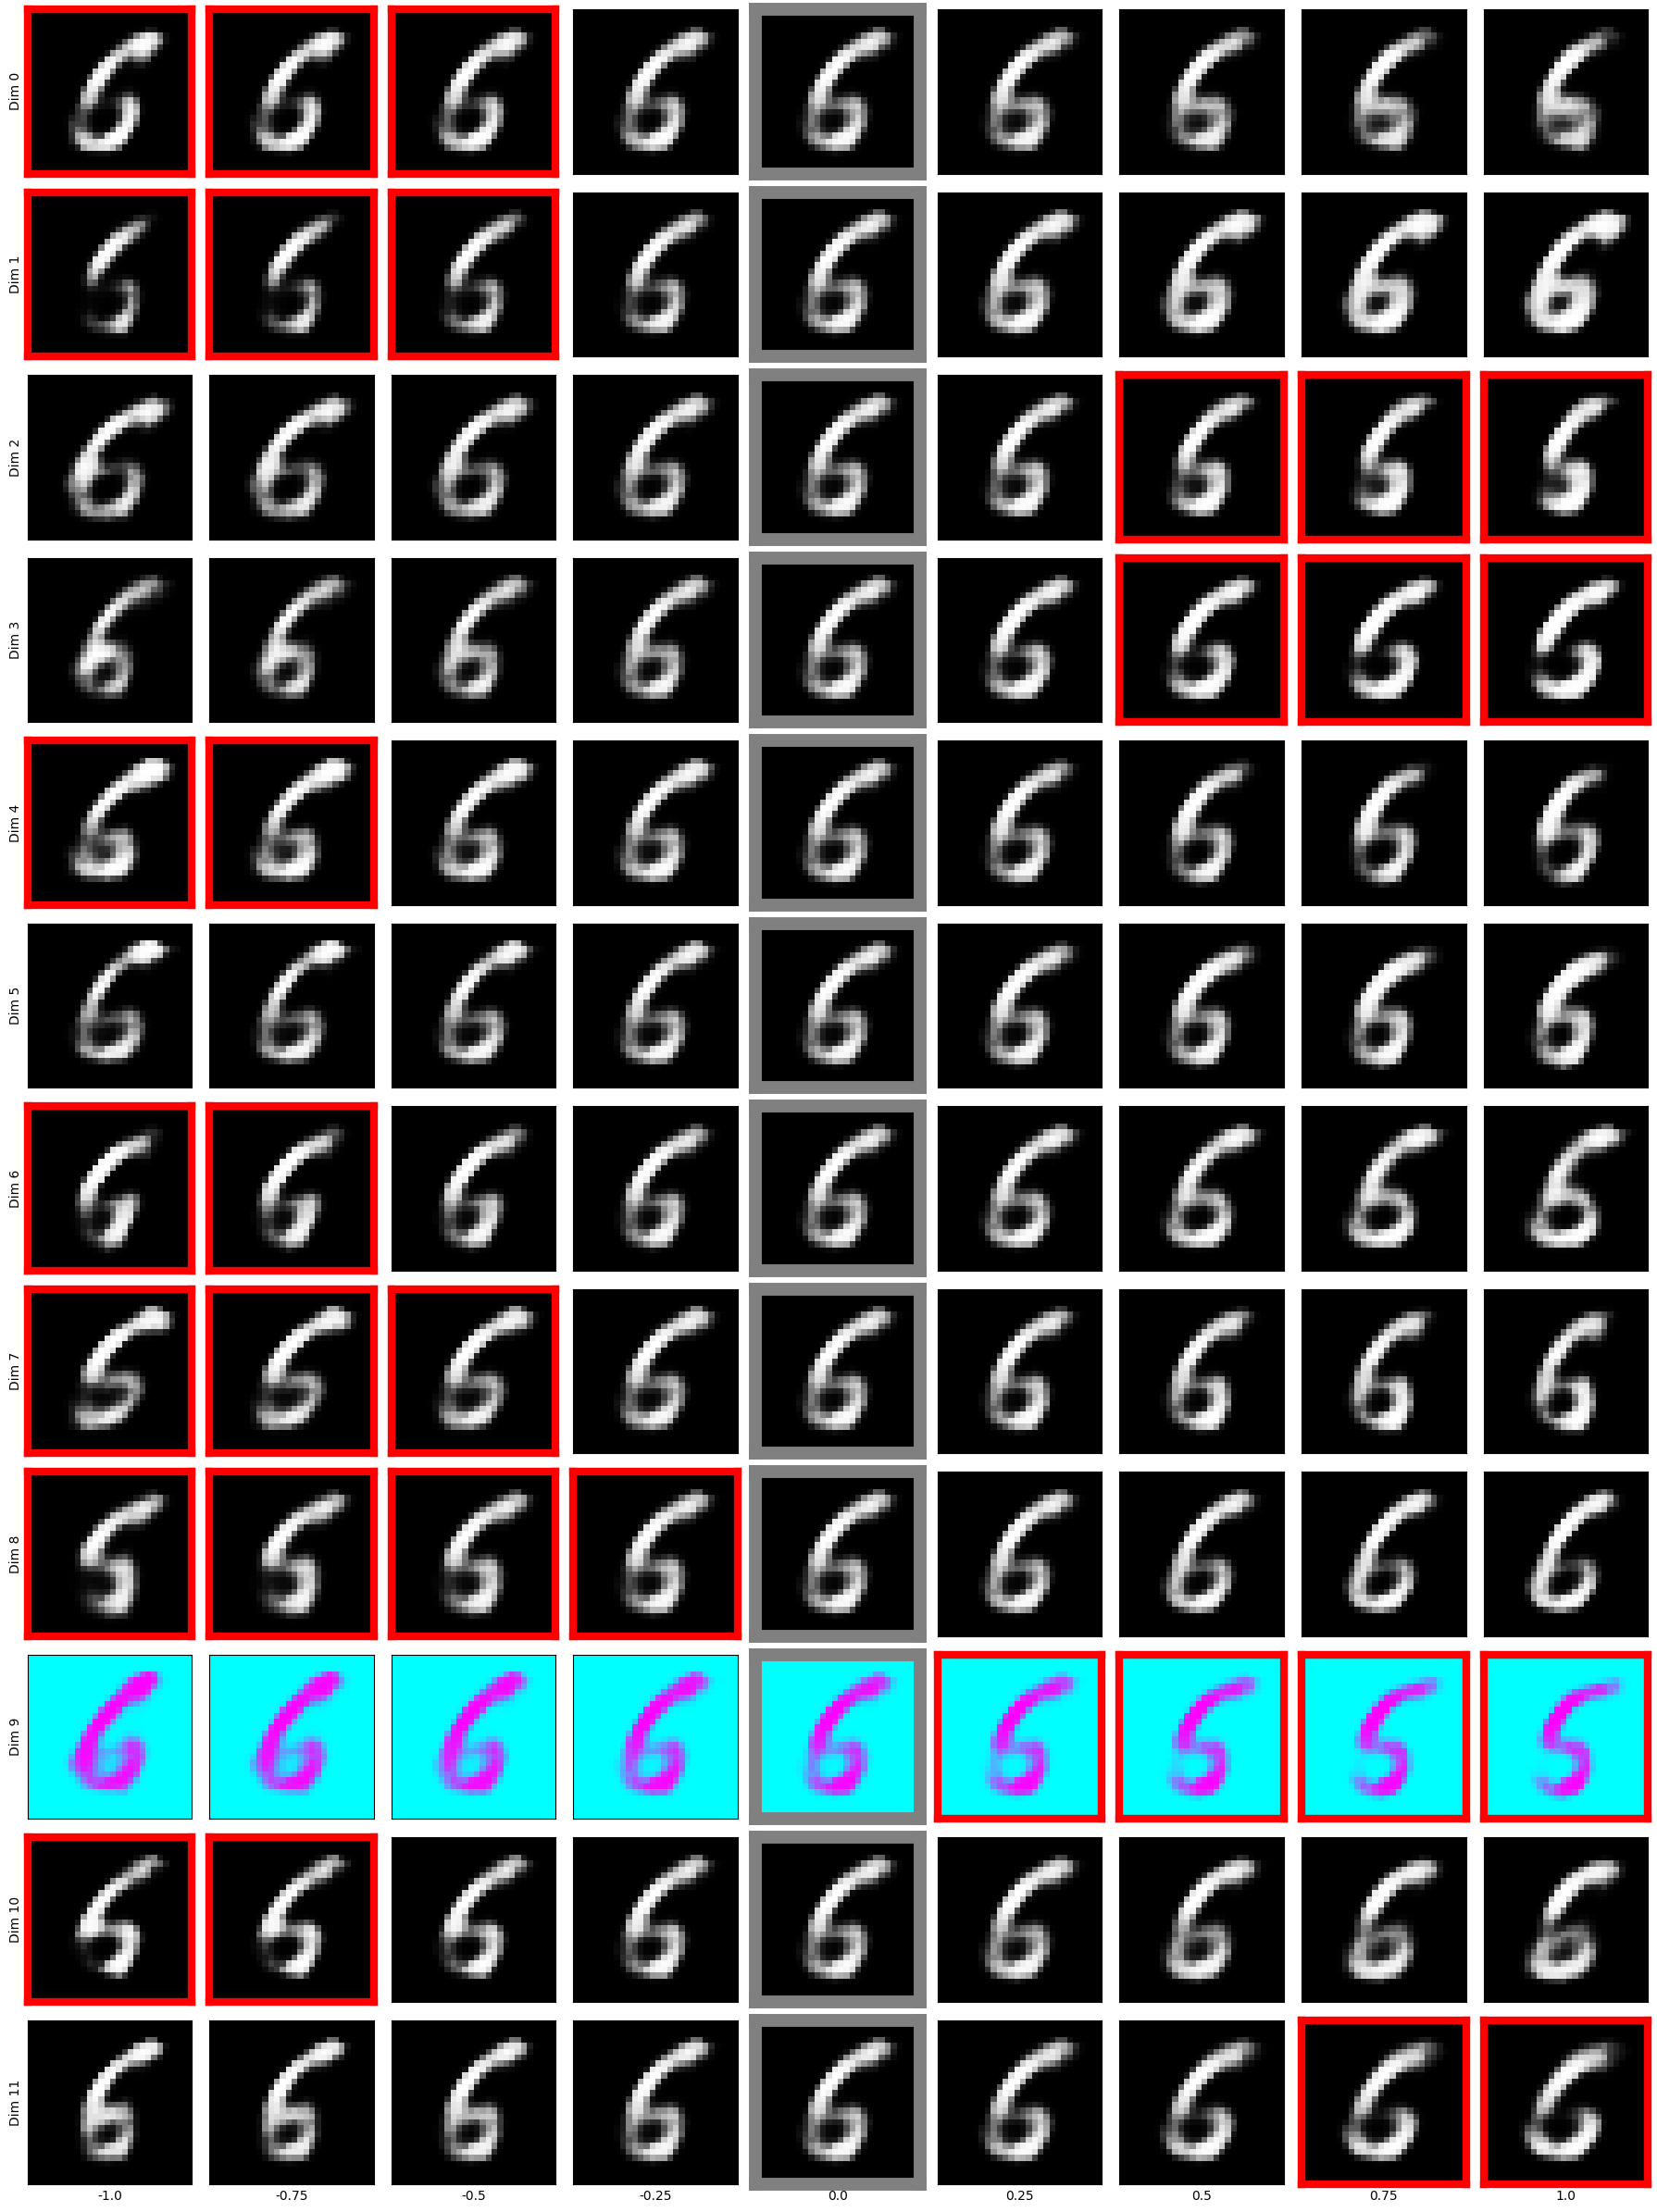

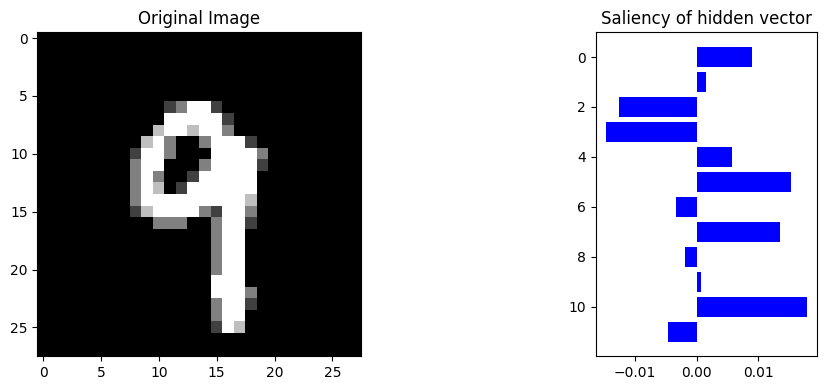

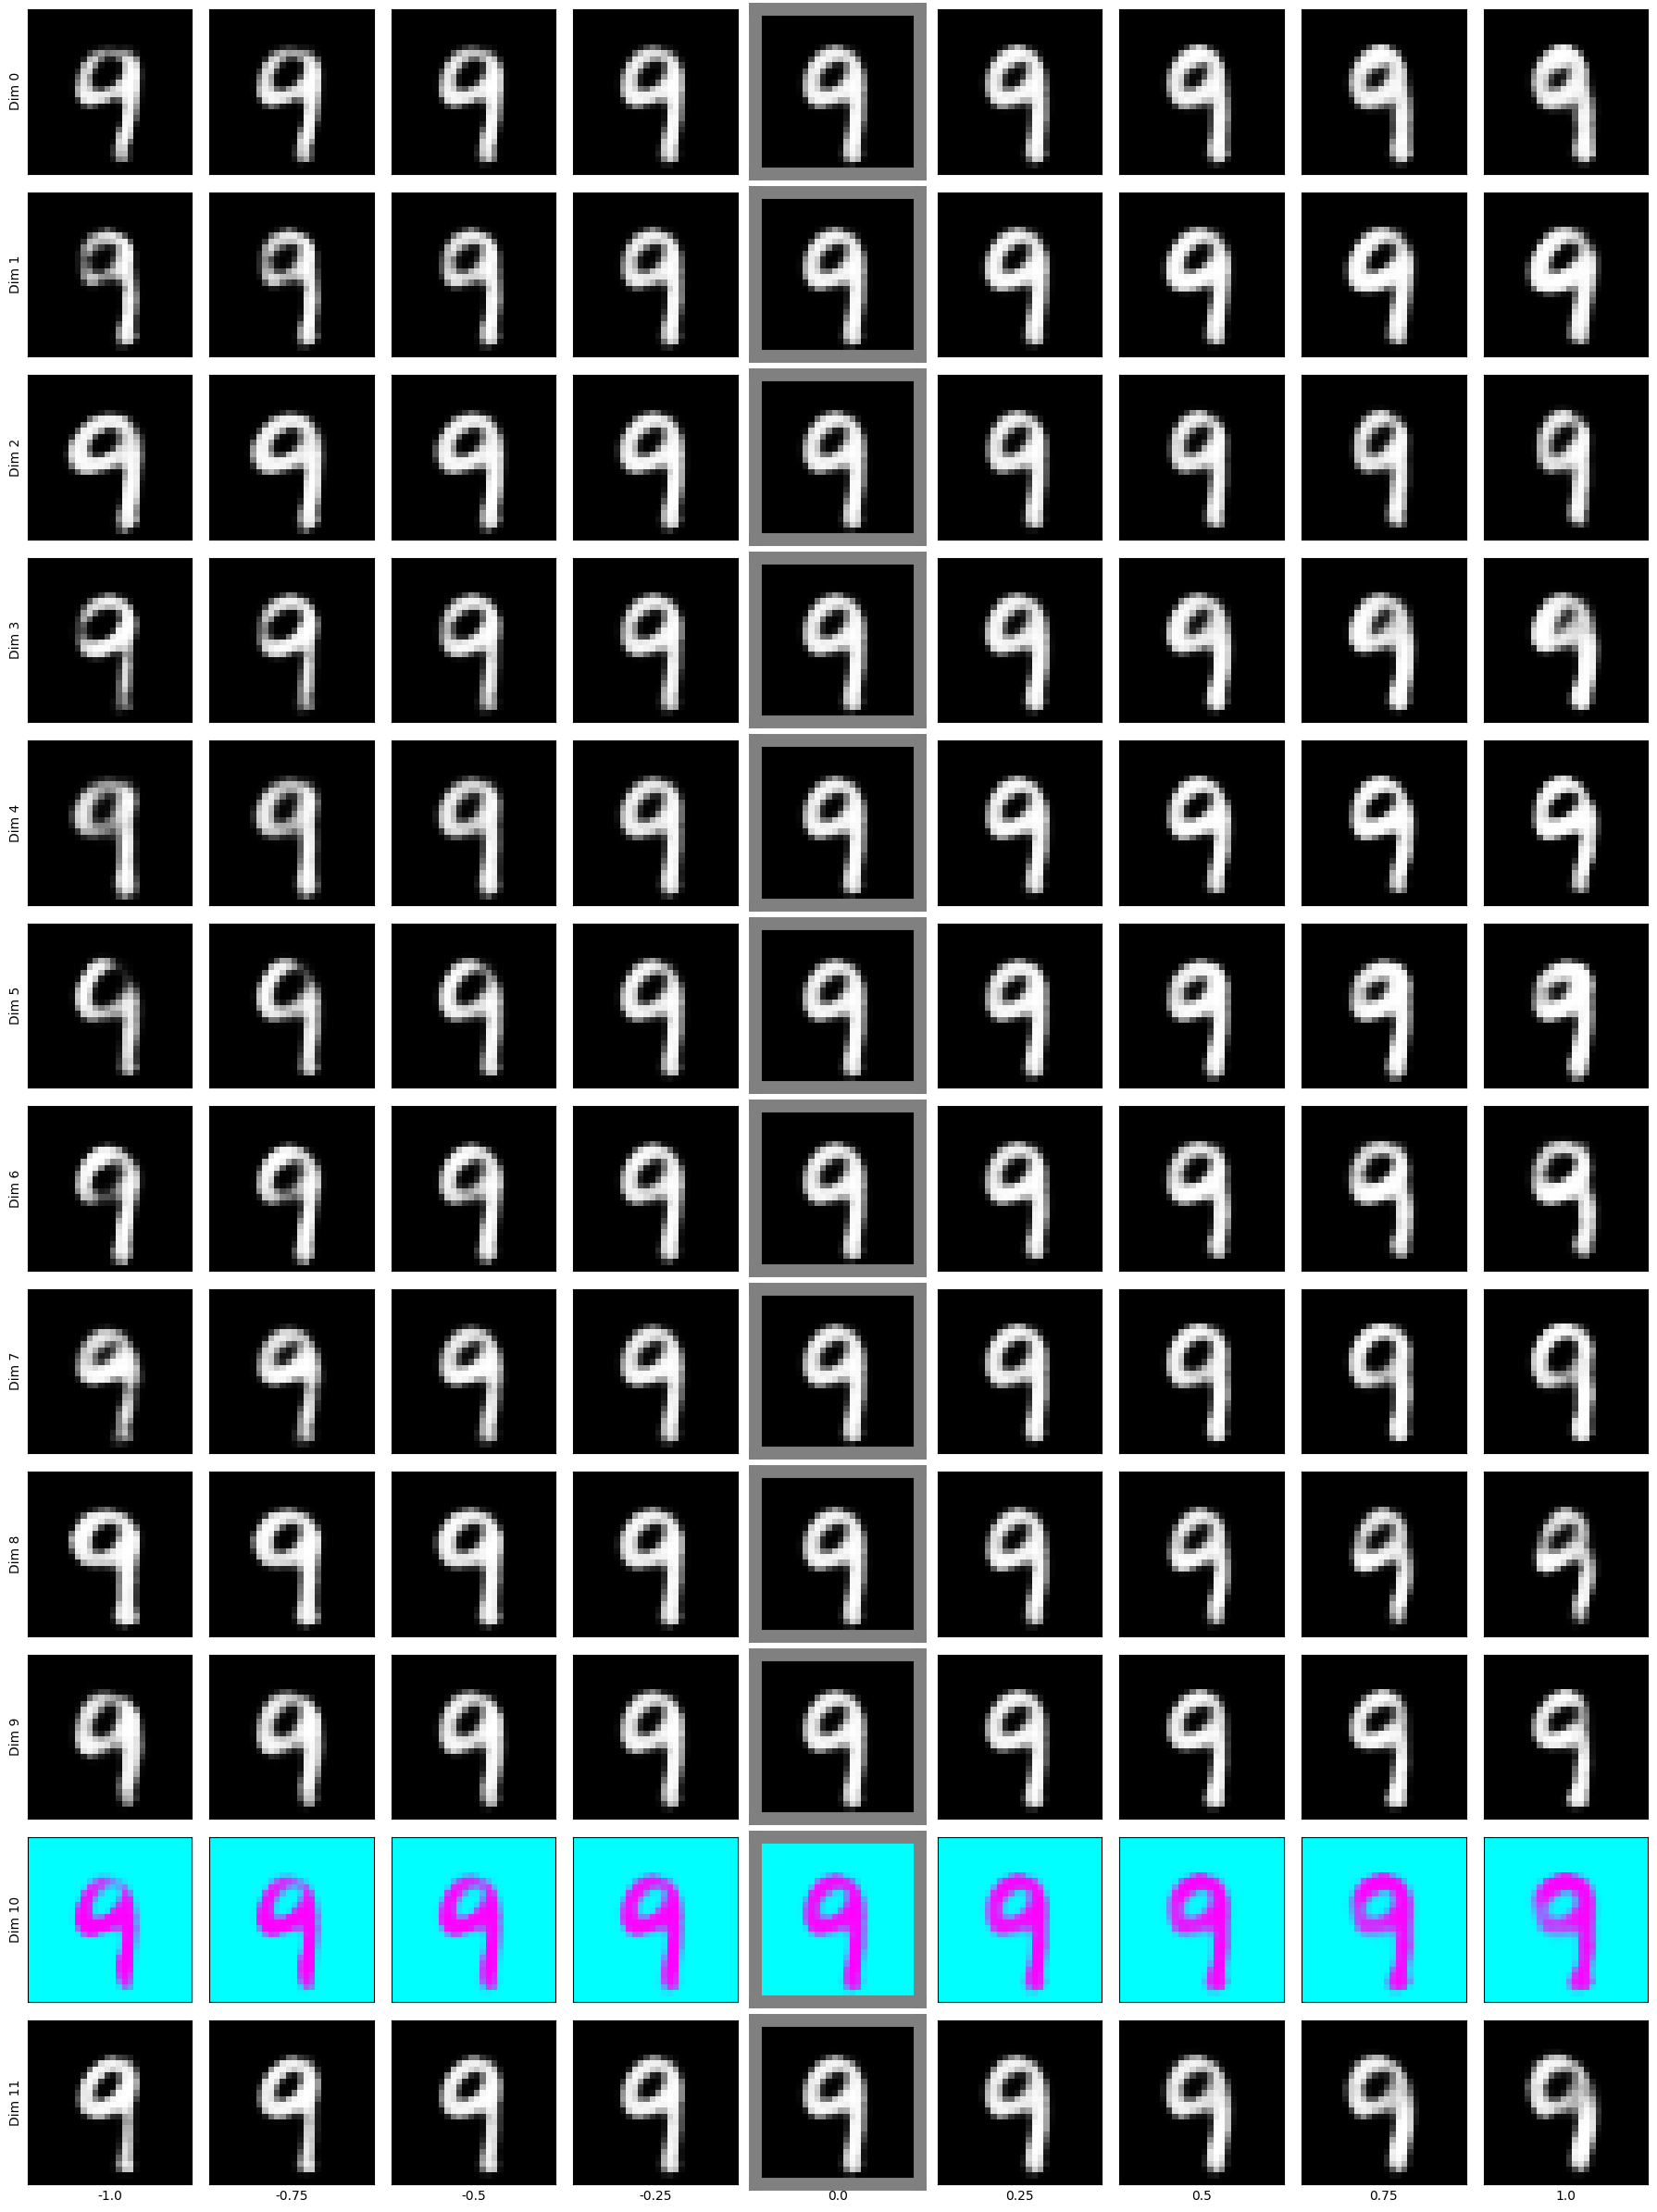

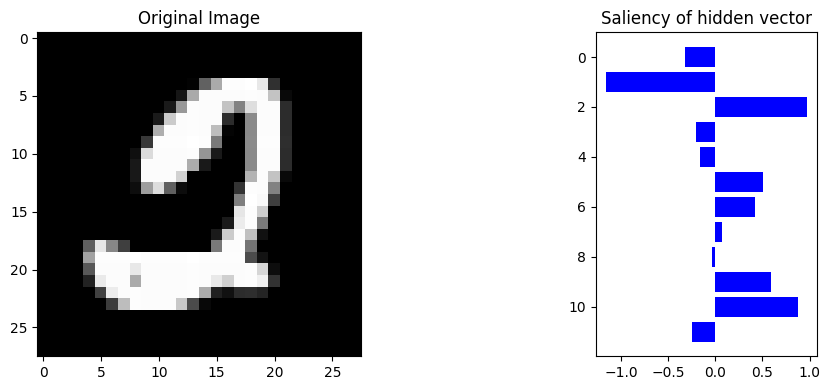

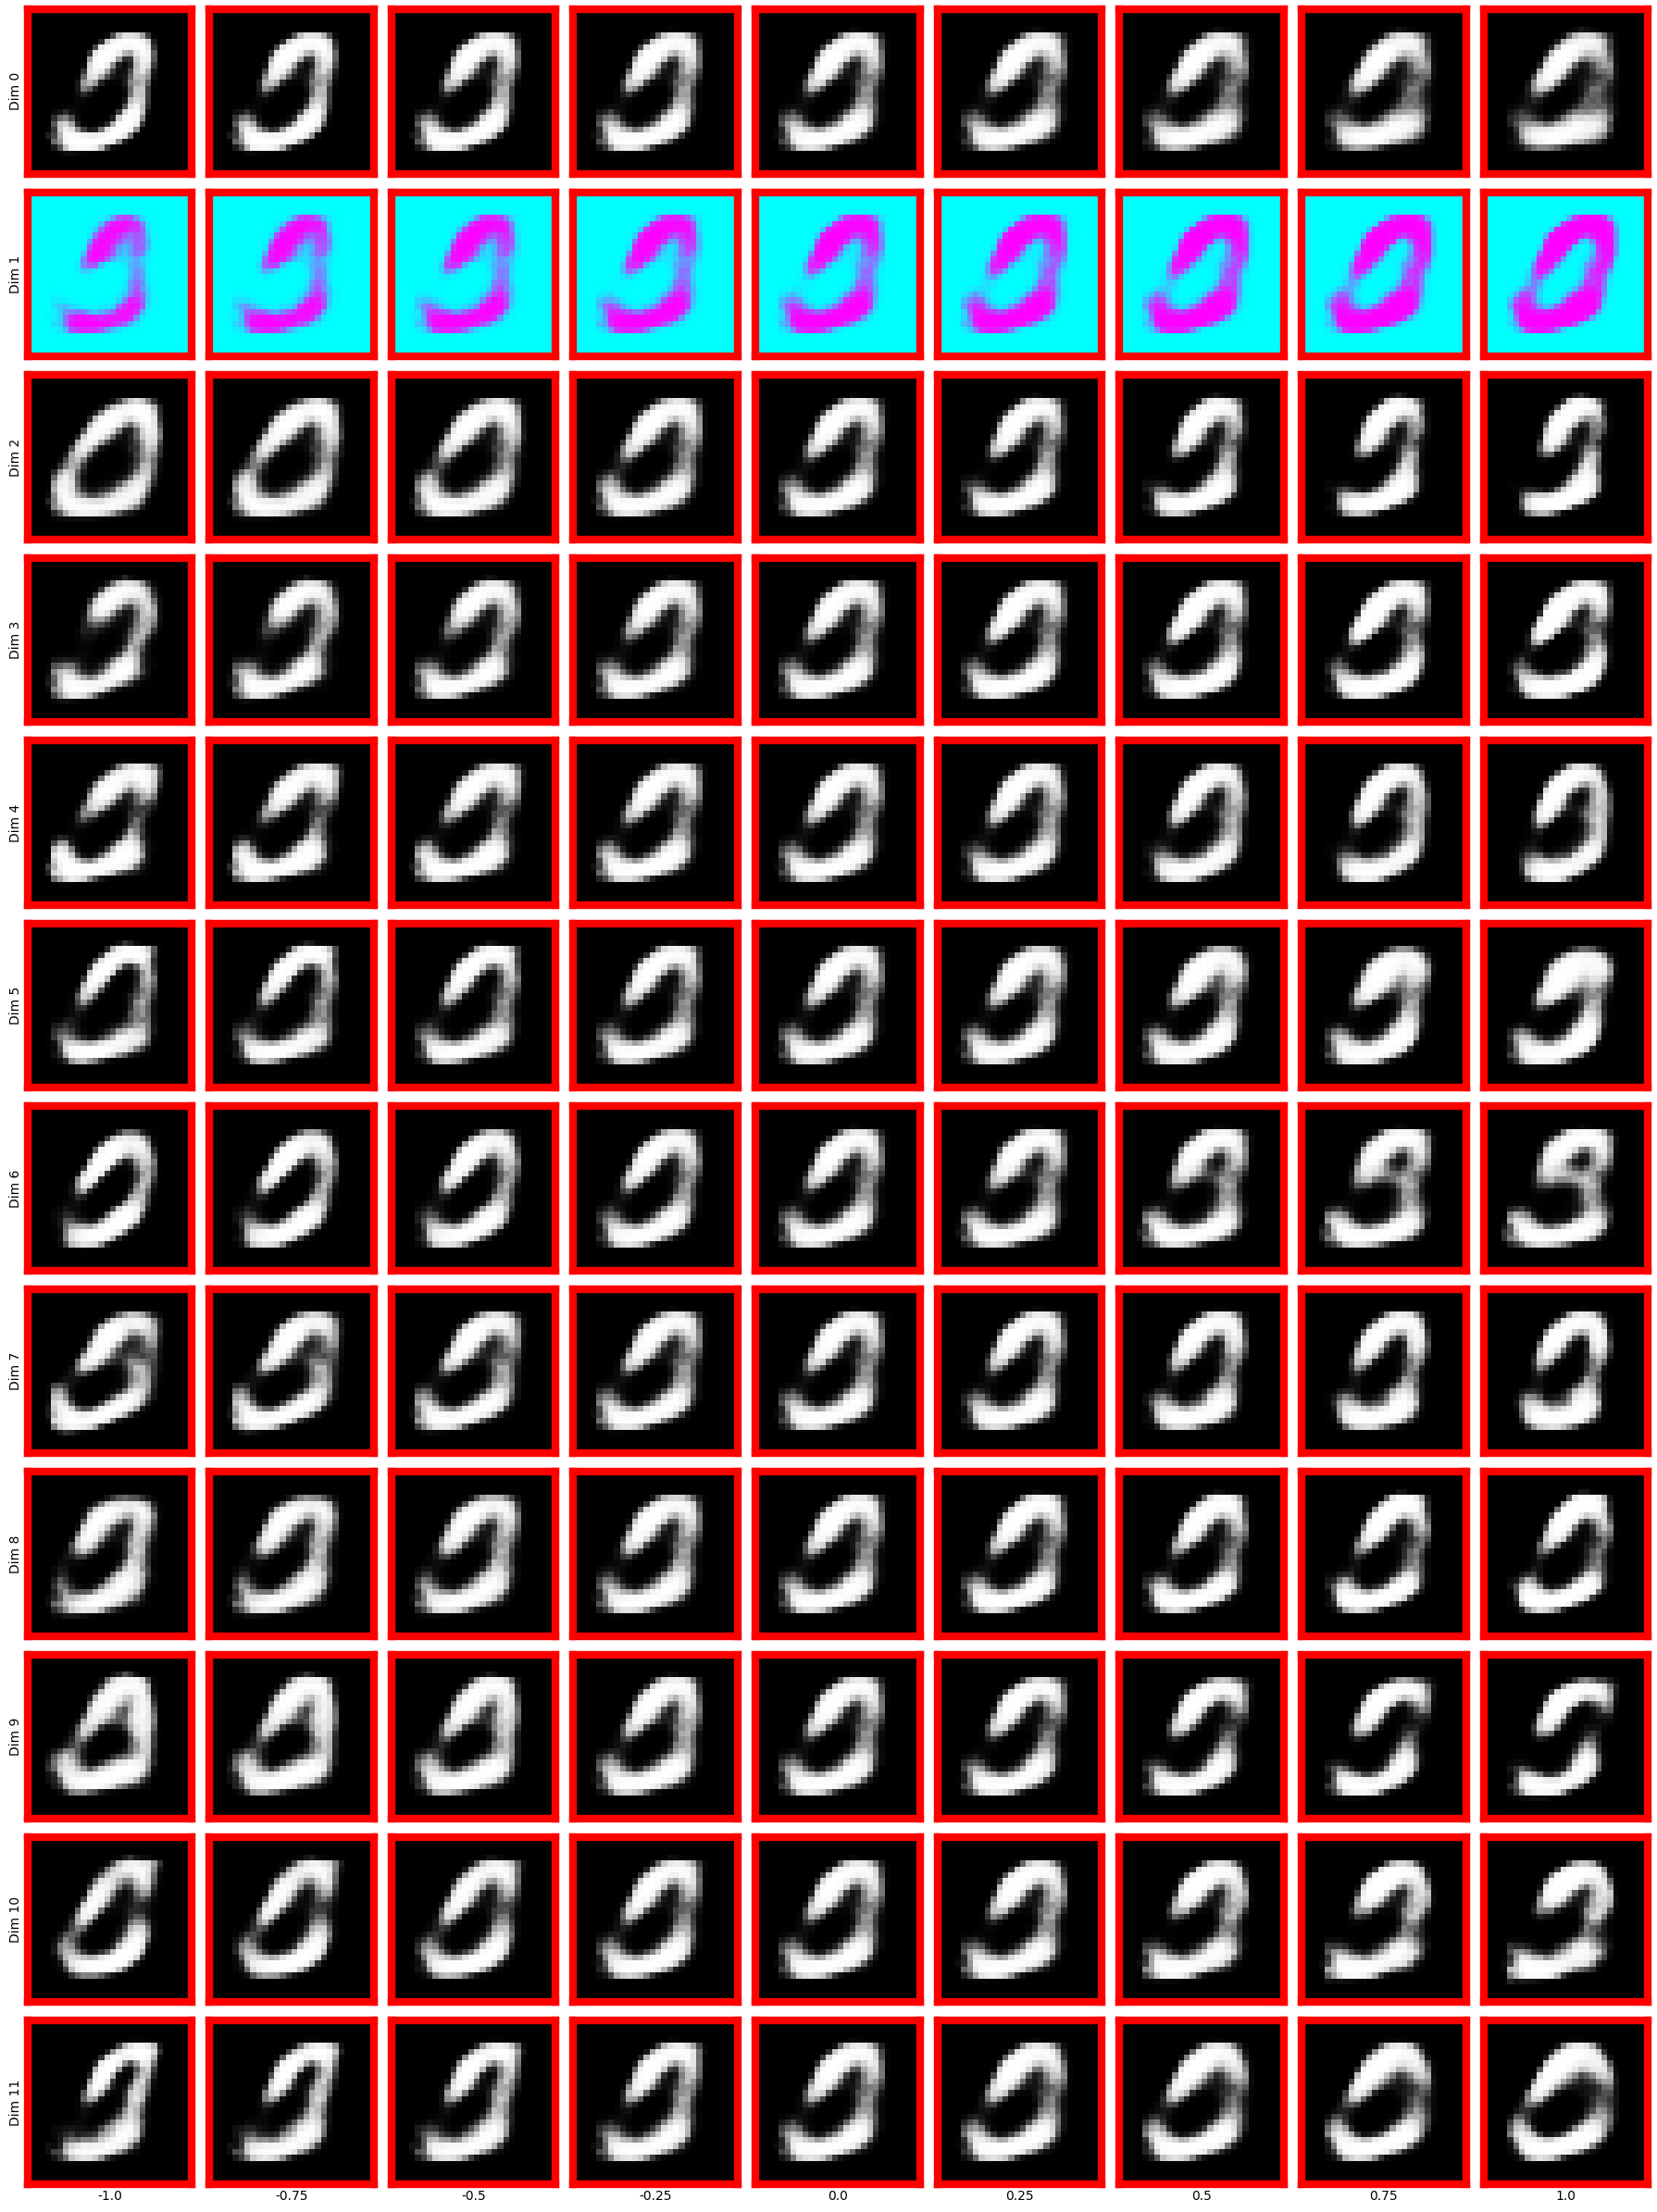

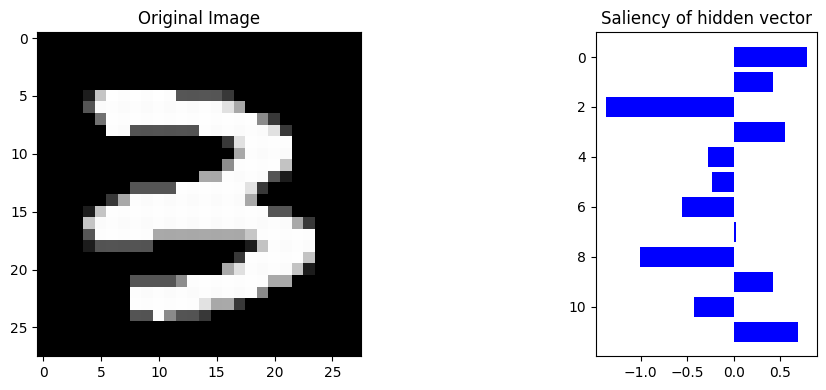

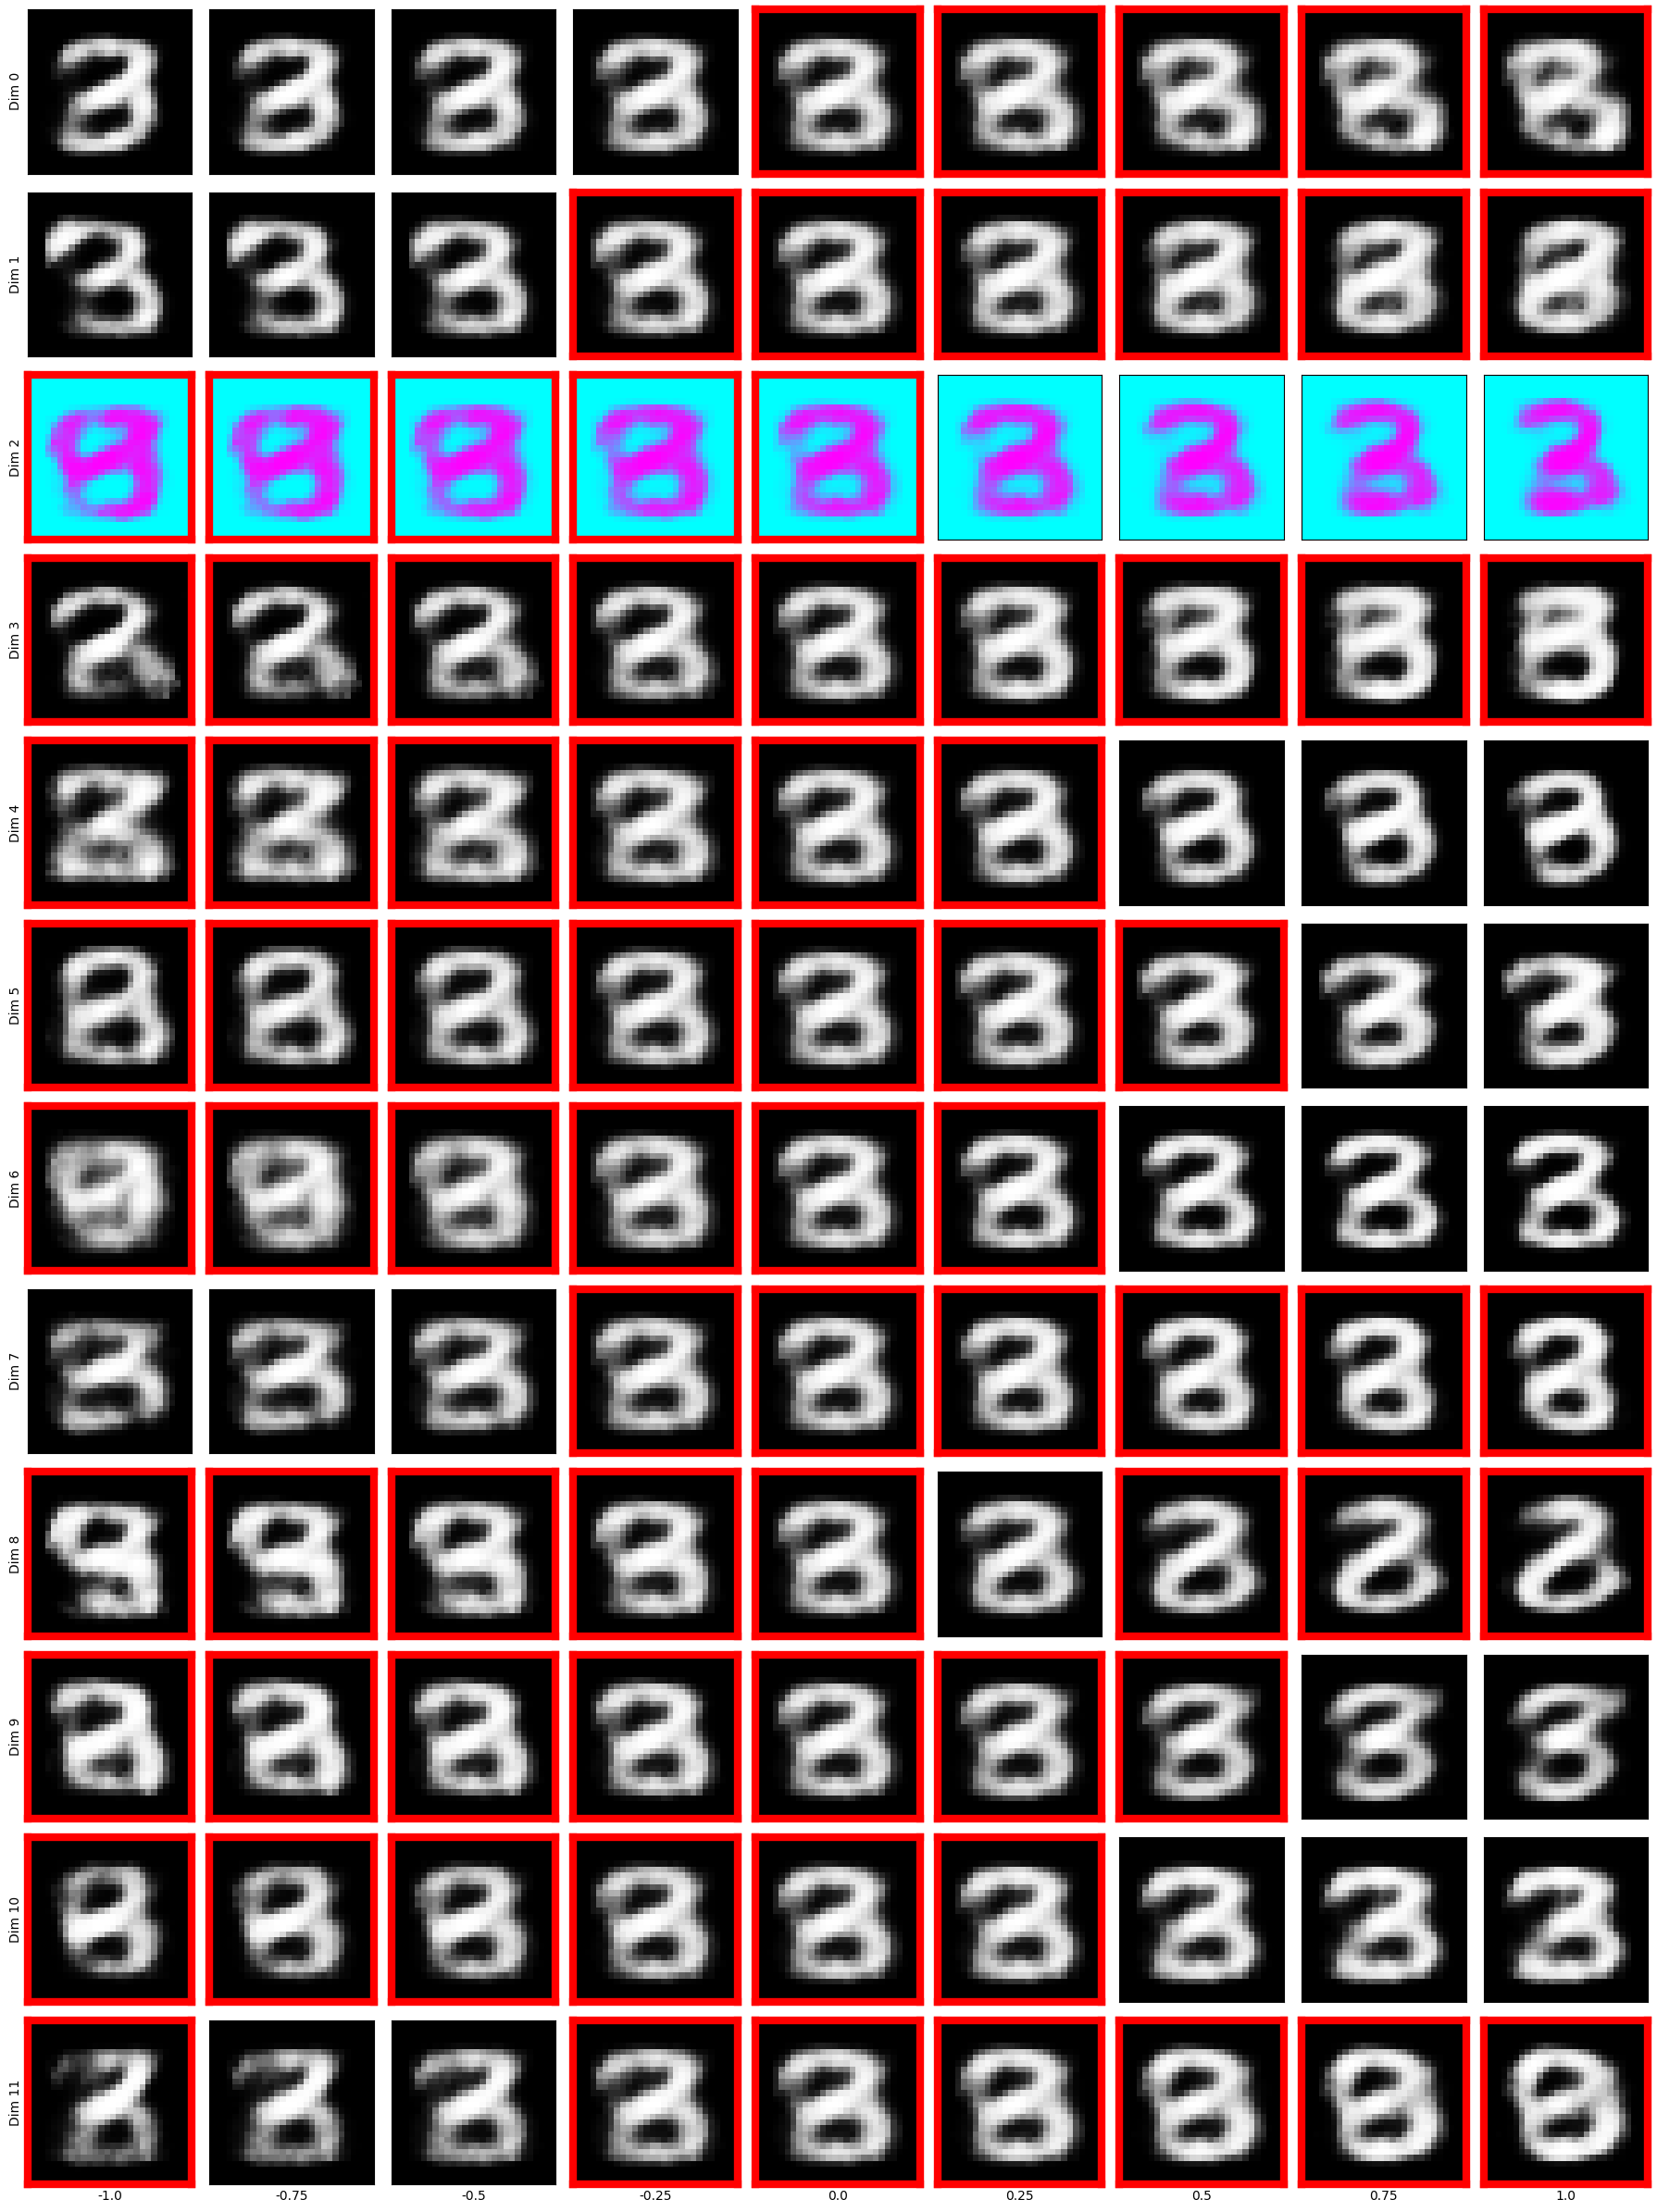

In [6]:
count = 10
for i in range(len(x_view)):
    x = np.array([h_view[i]])
    y = np.array([y_view_onehot[i]])
    # g = gradient_of_x(x, y, xai)
    g = saliency_of_x(x, xai)

    g_npy = np.squeeze(g.numpy())
    # plot_image_and_gradient(np.reshape(x_view[i], (28, 28)), g_npy)
    plot_image_and_gradient(np.reshape(x_view[i], (28, 28)), g_npy, title="Saliency of hidden vector")

    # Identify the maximum gradient entry
    max_grad_index = np.argmax(np.abs(g_npy))
    # latent_space_display(x, vae.decoder, highlight_dim=max_grad_index)
    latent_space_display_mark(x, view_sample_labels[i], vae.decoder, xai, highlight_dim=int(max_grad_index))

    if count <= 0:
        break
    count -= 1